# Decision Tree Project Tutorial

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [2]:
# Obtaining the dimensions
print(total_data.shape)

(768, 9)


In [3]:
# Obtaining information about data types and non-null values
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


The dataset has 768 rows and 9 columns. There are no null values. 
The data is divided into:
- 8 predictor variables ("Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction" and "Age"). All of them are numerical. 
- 1 target ("Outcome"). It is also numerical. 

In [4]:
#Looking for possible duplicates
print(total_data.duplicated().sum())

0


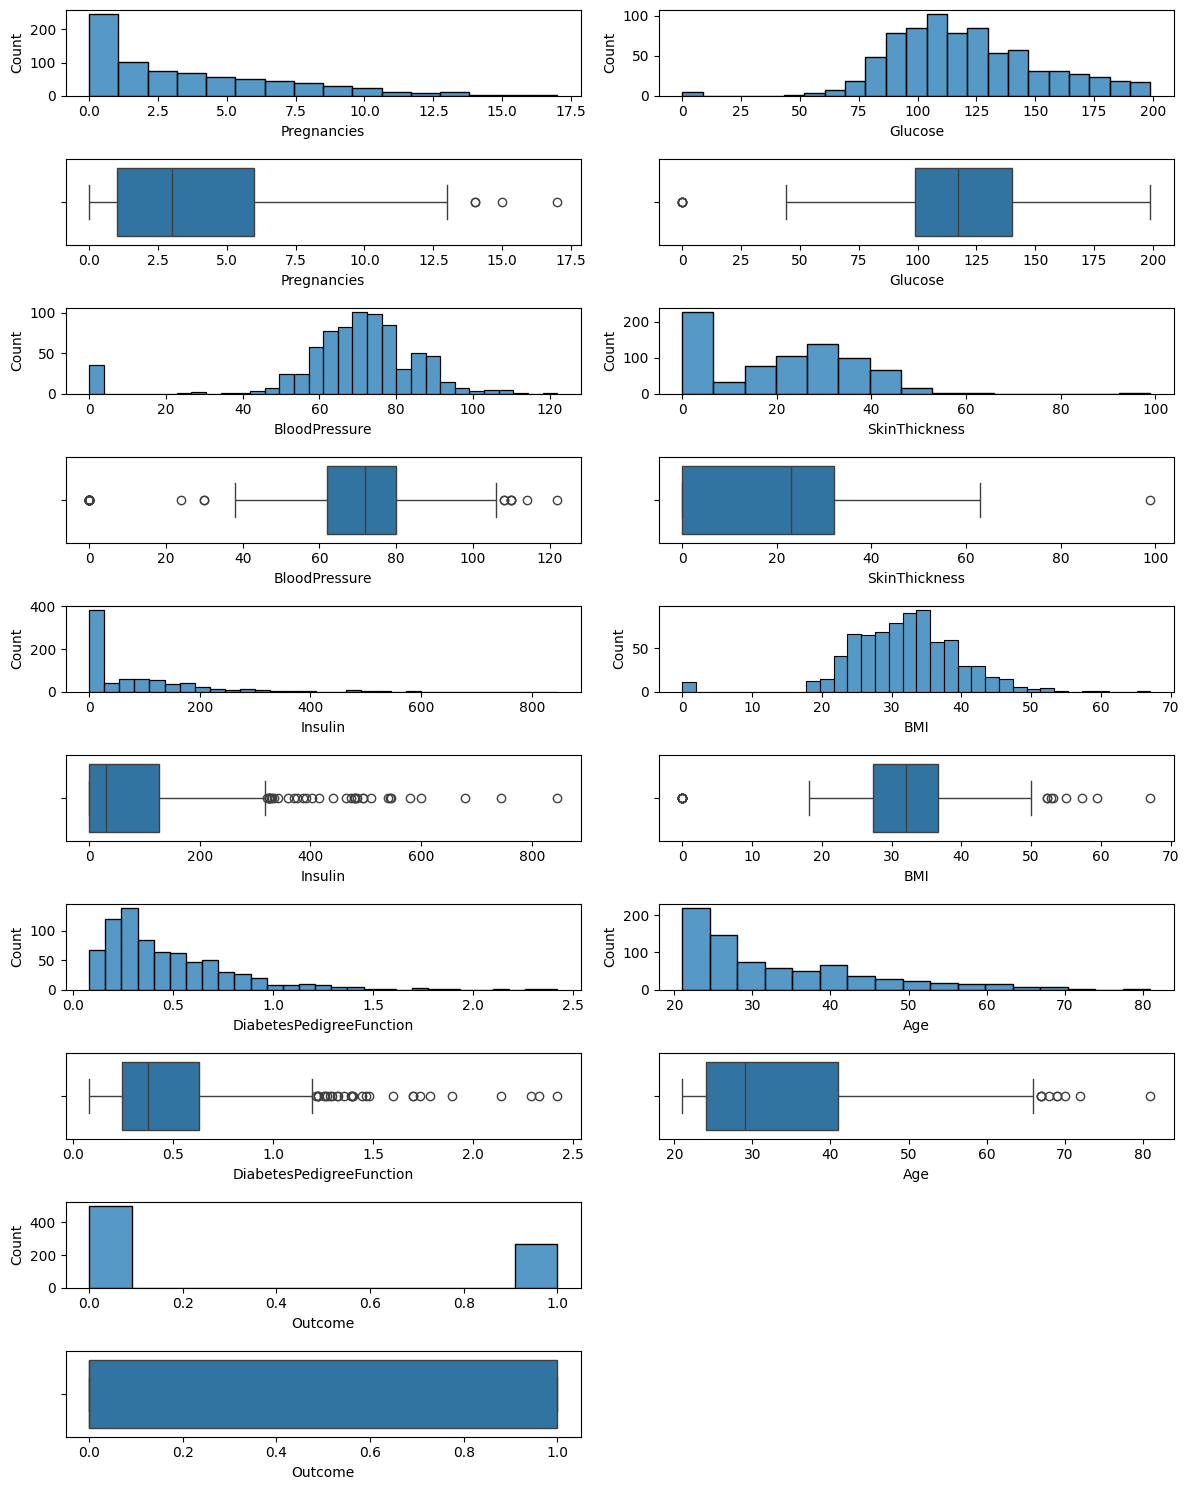

In [5]:
#Analysis of numerical variables

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis= plt.subplots (10,2, figsize=(12,15))

#Creating a multiple figure with histogram and box plots
sns.histplot(ax=axis[0,0], data=total_data, x="Pregnancies")
sns.boxplot(ax=axis[1,0], data=total_data, x="Pregnancies")
sns.histplot(ax=axis[0,1], data=total_data, x="Glucose")
sns.boxplot(ax=axis[1,1], data=total_data, x="Glucose")
sns.histplot(ax=axis[2,0], data=total_data, x="BloodPressure")
sns.boxplot(ax=axis[3,0], data=total_data, x="BloodPressure")
sns.histplot(ax=axis[2,1], data=total_data, x="SkinThickness")
sns.boxplot(ax=axis[3,1], data=total_data, x="SkinThickness")
sns.histplot(ax=axis[4,0], data=total_data, x="Insulin")
sns.boxplot(ax=axis[5,0], data=total_data, x="Insulin")
sns.histplot(ax=axis[4,1], data=total_data, x="BMI")
sns.boxplot(ax=axis[5,1], data=total_data, x="BMI")
sns.histplot(ax=axis[6,0], data=total_data, x="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[7,0], data=total_data, x="DiabetesPedigreeFunction")
sns.histplot(ax=axis[6,1], data=total_data, x="Age")
sns.boxplot(ax=axis[7,1], data=total_data, x="Age")
sns.histplot(ax=axis[8,0], data=total_data, x="Outcome")
sns.boxplot(ax=axis[9,0], data=total_data, x="Outcome")

plt.delaxes(ax=axis[8,1]); plt.delaxes(ax=axis[9,1])

#Adjusting the layout
plt.tight_layout()

#Showing the plot
plt.show()

From the graph we can conclude that:
-	Pregnancies: The distribution is right skewed, showing that most individuals have fewer pregnancies. The boxplot shows several isolated outliers over 13. 
-	Glucose: The distribution could be considered quite symmetric.
-	BloodPressure: The distribution seems quite normally distributed but the boxplot shows as well the presence of outliers both on the upper and on the lower side. 
-	SkinThickness: The distribution of the values shows some skewness.
-	Insulin: The majority of values are concentrated at lower levels but the boxplot shows quite a few outliers from approximately 320 on. 
-	BMI (Body Mass Index): The histogram shows a quite symmetric distribution of the values with several outliers, especially on the upper side. 
-	DiabetesPedigreeFunction: The distribution is right skewed, and we can see quite a few outliers from approximately 1,2 to 2,5.
-	Age: The distribution is right skewed, since most of the people are on the younger side. We can see some outliers starting from 68 years old. 
-	Outcome: It shows that the number of people Diabetes free is twice as high as the number of people with the disease.


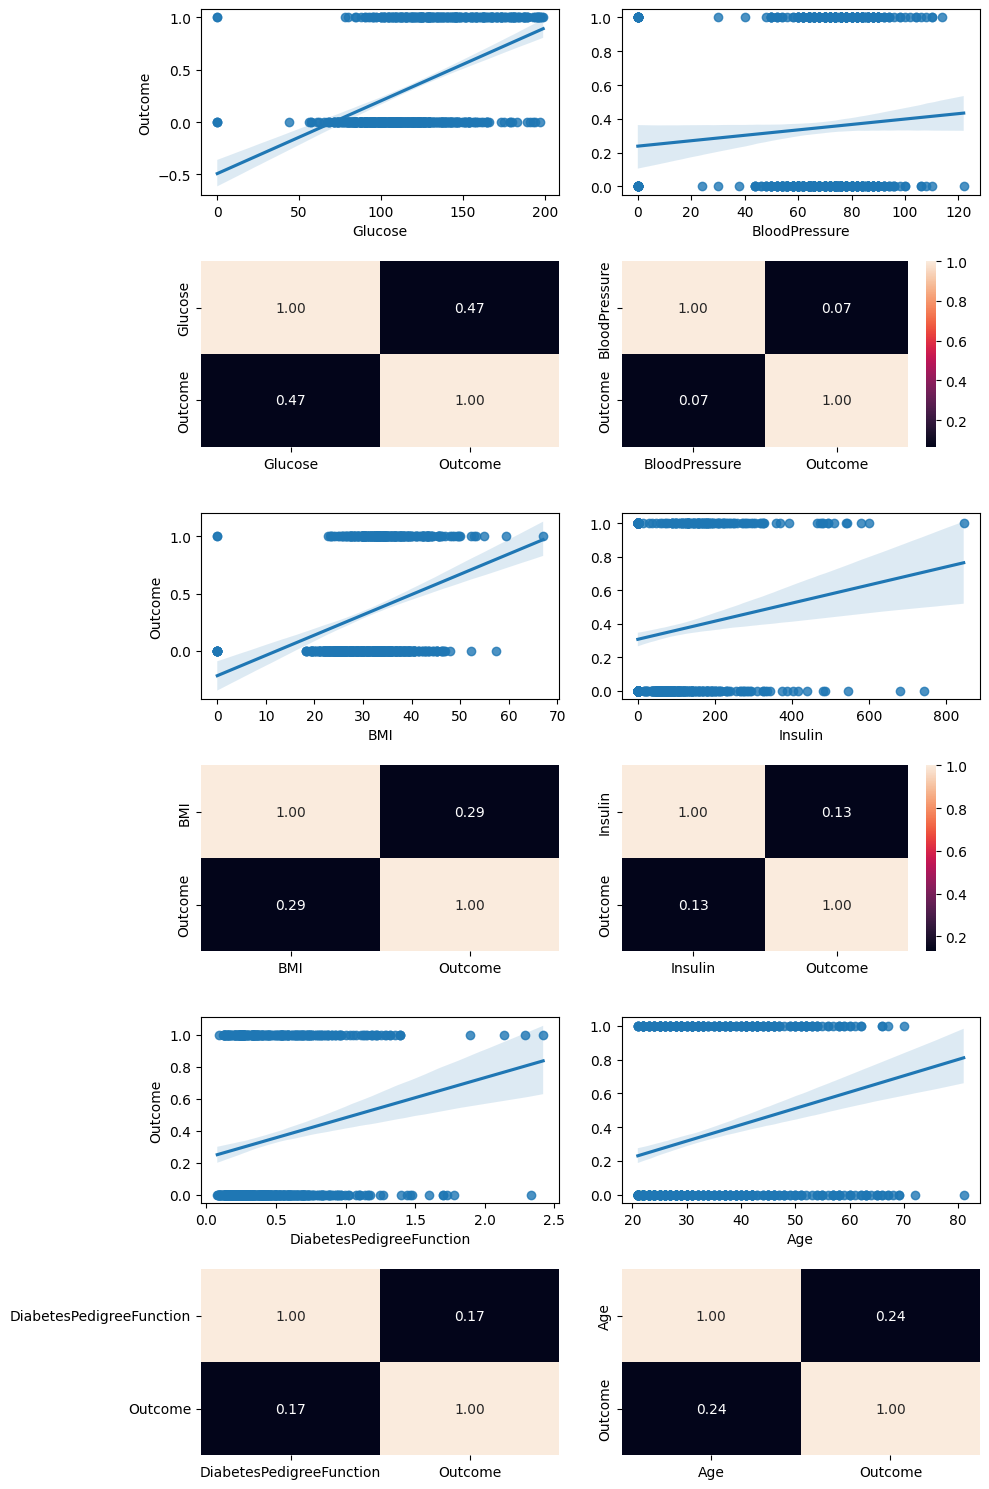

In [6]:

#Numerical-numerical analysis
fig, axis = plt.subplots(6, 2, figsize = (10, 15))

# Creating a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "Glucose", y = "Outcome")
sns.heatmap(total_data[["Glucose", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "BloodPressure", y = "Outcome").set(ylabel=None)
sns.heatmap(total_data[["BloodPressure", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = total_data, x = "BMI", y = "Outcome")
sns.heatmap(total_data[["BMI", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = total_data, x = "Insulin", y = "Outcome").set(ylabel=None)
sns.heatmap(total_data[["Insulin", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])
sns.regplot(ax = axis[4, 0], data = total_data, x = "DiabetesPedigreeFunction", y = "Outcome")
sns.heatmap(total_data[["DiabetesPedigreeFunction", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0], cbar = False)
sns.regplot(ax = axis[4, 1], data = total_data, x = "Age", y = "Outcome").set(ylabel=None)
sns.heatmap(total_data[["Age", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1], cbar = False)

# Adjusting the layout
plt.tight_layout()

# Showing the plot
plt.show()


Based on the graphs, we can conclude:
- BMI vs. Outcome: There is a positive correlation between BMI and the likelihood of having Diabetes, since the variable “Outcome” tends to increase as BMI does. 
- DiabetesPedigreeFunction vs. Outcome: The graph shows a correlation between these two variables, but not as significant as it is with other variables. 
- Age vs. Outcome: There seems to be a moderate positive correlation with the likelihood of diabetes, too. 
- Glucose vs. Outcome: This is the strongest correlation we can see on the graphs. As the plasma glucose concentration 2 hours after an oral glucose tolerance increases, the probability of having Diabetes tends to do it as well. 


In [7]:
total_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

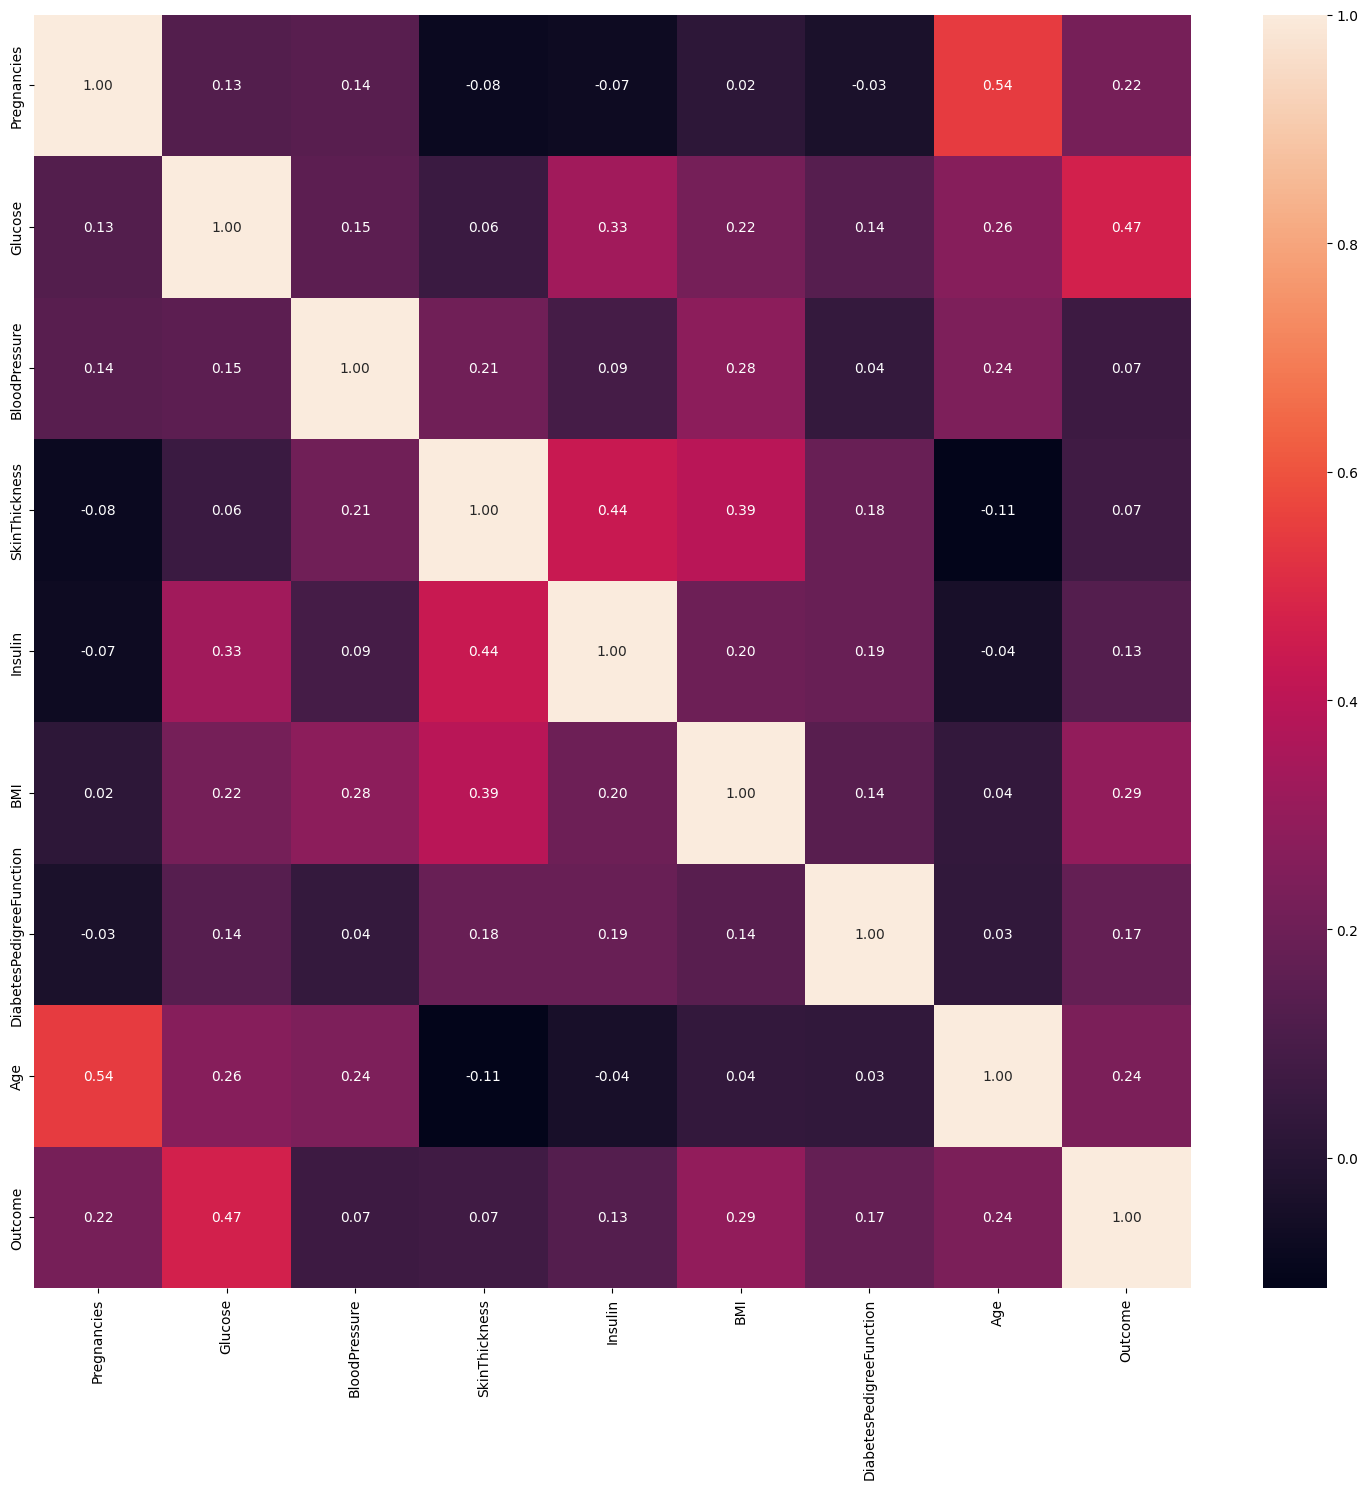

In [8]:
#Correlation analysis
#Heatmap creation
fig, axes = plt.subplots(figsize=(15, 15))
sns.heatmap(total_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(), annot = True, fmt = ".2f")
plt.tight_layout()
plt.show()

As seen in previous visualizations, “Glucose”, “BMI” and “Age” have a positive correlation with the likelihood of having Diabetes. The correlation between “outcome” and other variables like “BloodPressure”, "SkinThickness," "Insulin," and "DiabetesPedigreeFunction" is also there but it is not as strong. 
Variables like “Age” and “Pregnancies” as well as “Glucose” and “Insulin” are also correlated, which makes sense. 


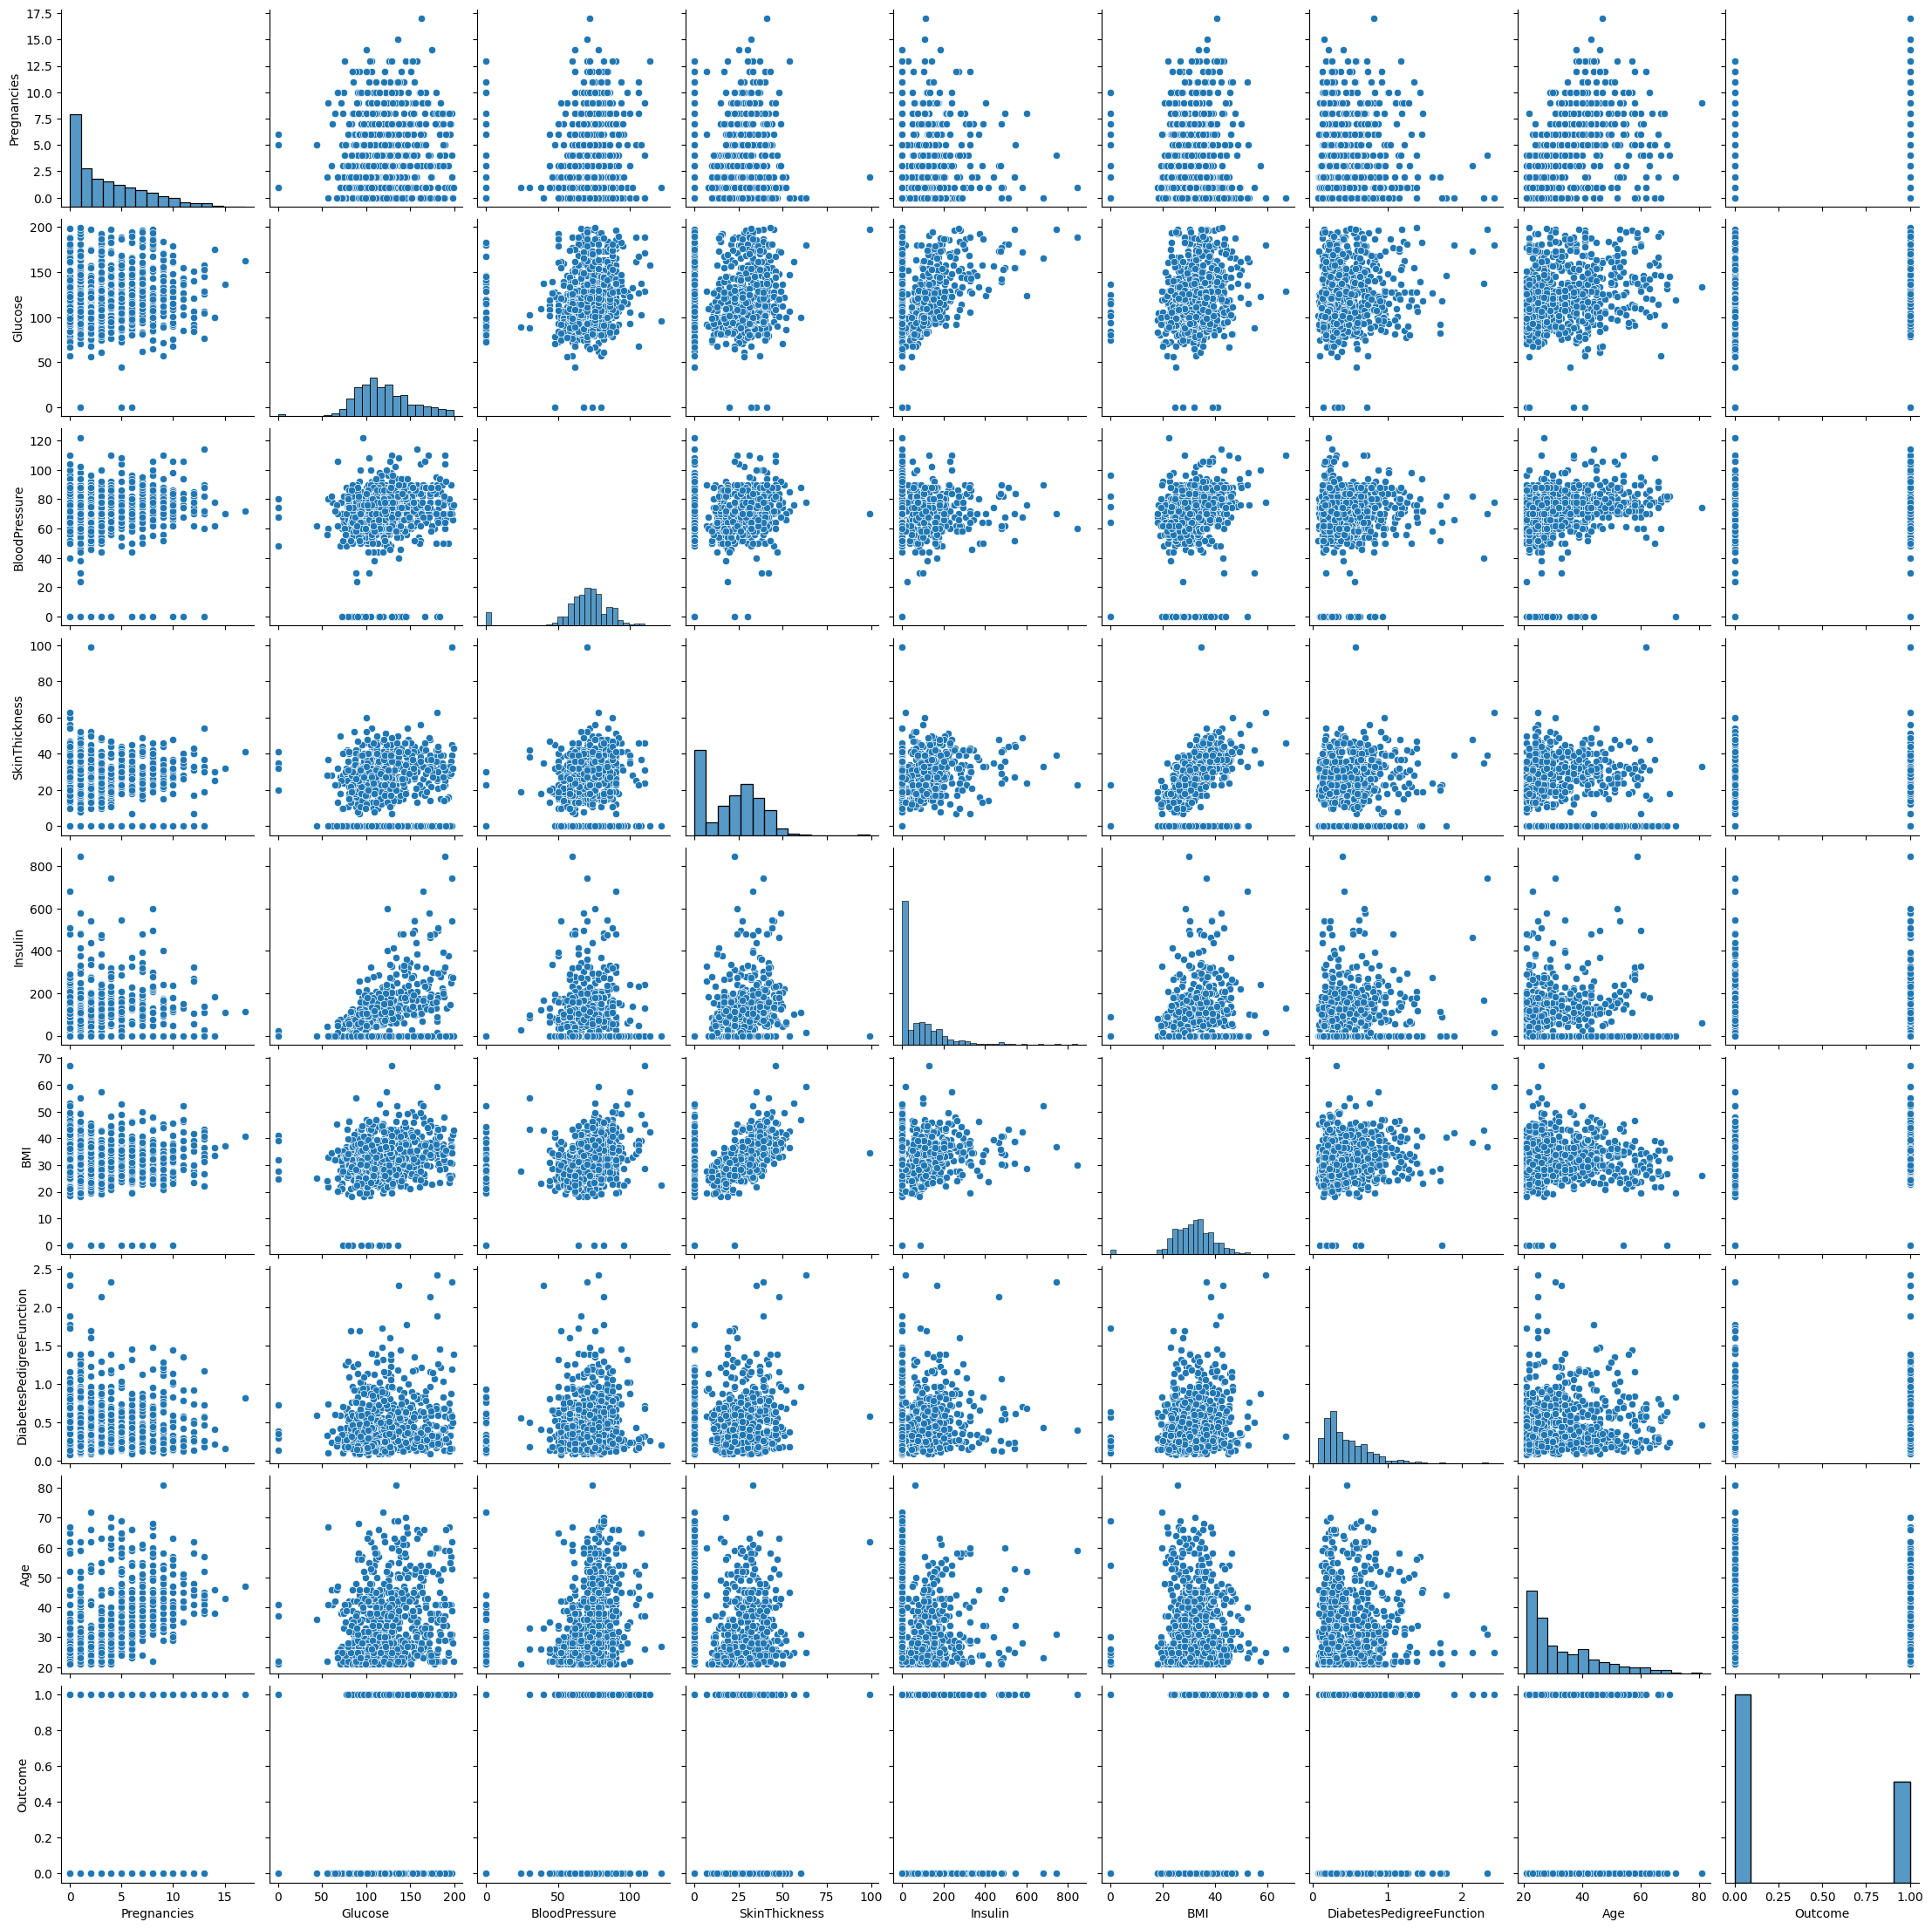

In [9]:
#Drawing the pairplot
sns.pairplot(data = total_data)

In [10]:
#Outlier analysis
total_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

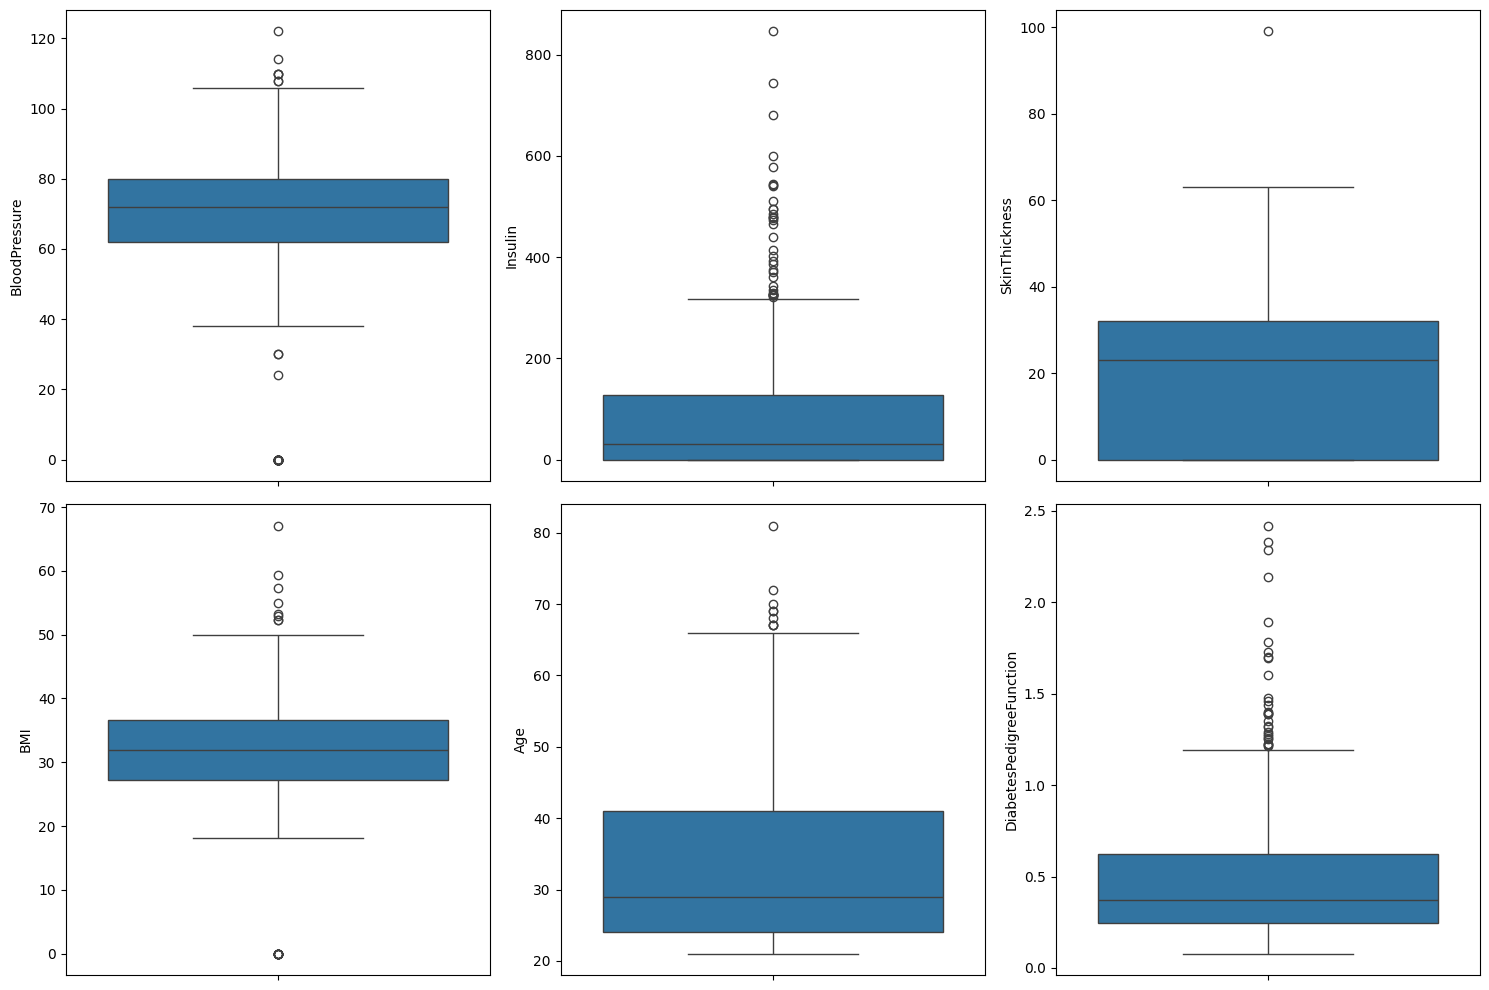

In [11]:
#Creating boxplots to check outliers
fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "BloodPressure")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Insulin")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "SkinThickness")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "BMI")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "Age")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "DiabetesPedigreeFunction")


plt.tight_layout()

plt.show()

In [12]:
#Creating the variable for no outliers
total_data_no_outliers = total_data.copy()

In [13]:
#Analysing the bloodpressure variable
blood_stats = total_data["BloodPressure"].describe()
print(blood_stats)
blood_iqr = blood_stats["75%"] - blood_stats["25%"]
blood_upper_limit = blood_stats["75%"] + 1.5*blood_iqr
blood_lower_limit = blood_stats["25%"] - 1.5*blood_iqr

print(f"The upper limit is {round(blood_upper_limit, 2)} and the lower limit is {round(blood_lower_limit, 2)}, with an interquartile range of {round(blood_iqr, 2)}")


count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
The upper limit is 107.0 and the lower limit is 35.0, with an interquartile range of 18.0


In [14]:
mean_blood = total_data["BloodPressure"].mean()
#print (mean_blood)

# Replacing outliers with the mean value
total_data_no_outliers['BloodPressure'] = total_data_no_outliers['BloodPressure'].apply(lambda x: mean_blood if (x > 107 or x < 35) else x)
total_data_no_outliers.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0             35        0  33.6   
1            1       85           66.0             29        0  26.6   
2            8      183           64.0              0        0  23.3   
3            1       89           66.0             23       94  28.1   
4            0      137           40.0             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [15]:
#Analysing the insulin variable
insulin_stats = total_data["Insulin"].describe()
print(insulin_stats)
insulin_iqr = insulin_stats["75%"] - insulin_stats["25%"]
insulin_upper_limit = insulin_stats["75%"] + 1.5*insulin_iqr
insulin_lower_limit = insulin_stats["25%"] - 1.5*insulin_iqr

print(f"The upper limit is {round(insulin_upper_limit, 2)} and the lower limit is {round(insulin_lower_limit, 2)}, with an interquartile range of {round(insulin_iqr, 2)}")


count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64
The upper limit is 318.12 and the lower limit is -190.88, with an interquartile range of 127.25


In [16]:
from statistics import mode
mode_insulin = total_data["Insulin"].mode()
#print (mode_insulin)

# Replacing outliers with the mode value
total_data_no_outliers['Insulin'] = total_data_no_outliers['Insulin'].apply(lambda x: mode_insulin[0] if x > 318.12 else x)
total_data_no_outliers.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0             35        0  33.6   
1            1       85           66.0             29        0  26.6   
2            8      183           64.0              0        0  23.3   
3            1       89           66.0             23       94  28.1   
4            0      137           40.0             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [17]:
#Analysing the skinthickness variable
skin_stats = total_data["SkinThickness"].describe()
print(skin_stats)
skin_iqr = skin_stats["75%"] - skin_stats["25%"]
skin_upper_limit = skin_stats["75%"] + 1.5*skin_iqr
skin_lower_limit = skin_stats["25%"] - 1.5*skin_iqr

print(f"The upper limit is {round(skin_upper_limit, 2)} and the lower limit is {round(skin_lower_limit, 2)}, with an interquartile range of {round(skin_iqr, 2)}")



count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64
The upper limit is 80.0 and the lower limit is -48.0, with an interquartile range of 32.0


In [18]:
mode_skin = total_data["SkinThickness"].mode()
#print (mode_nights)

# Replacing outliers with the mode value
total_data_no_outliers['SkinThickness'] = total_data_no_outliers['SkinThickness'].apply(lambda x: mode_skin[0] if x > 80 else x)
total_data_no_outliers.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0             35        0  33.6   
1            1       85           66.0             29        0  26.6   
2            8      183           64.0              0        0  23.3   
3            1       89           66.0             23       94  28.1   
4            0      137           40.0             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [19]:
#Analysing the bmi variable
bmi_stats = total_data["BMI"].describe()
print(bmi_stats)
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
bmi_upper_limit = bmi_stats["75%"] + 1.5*bmi_iqr
bmi_lower_limit = bmi_stats["25%"] - 1.5*bmi_iqr

print(f"The upper limit is {round(bmi_upper_limit, 2)} and the lower limit is {round(bmi_lower_limit, 2)}, with an interquartile range of {round(bmi_iqr, 2)}")



count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64
The upper limit is 50.55 and the lower limit is 13.35, with an interquartile range of 9.3


In [20]:
mean_bmi = total_data["BMI"].mean()
#print (mean_bmi)

# Replacing outliers with the mean value
total_data_no_outliers['BMI'] = total_data_no_outliers['BMI'].apply(lambda x: mean_bmi if (x > 50.55 or x < 13.35) else x)
total_data_no_outliers.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0             35        0  33.6   
1            1       85           66.0             29        0  26.6   
2            8      183           64.0              0        0  23.3   
3            1       89           66.0             23       94  28.1   
4            0      137           40.0             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [21]:
#Analysing the age variable
age_stats = total_data["Age"].describe()
print(age_stats)
age_iqr = age_stats["75%"] - age_stats["25%"]
age_upper_limit = age_stats["75%"] + 1.5*age_iqr
age_lower_limit = age_stats["25%"] - 1.5*age_iqr

print(f"The upper limit is {round(age_upper_limit, 2)} and the lower limit is {round(age_lower_limit, 2)}, with an interquartile range of {round(age_iqr, 2)}")



count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64
The upper limit is 66.5 and the lower limit is -1.5, with an interquartile range of 17.0


In [22]:
mode_age = total_data["Age"].mode()
#print (mode_age)

# Replacing outliers with the mode value
total_data_no_outliers['Age'] = total_data_no_outliers['Age'].apply(lambda x: mode_age[0] if x > 66.5 else x)
total_data_no_outliers.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0             35        0  33.6   
1            1       85           66.0             29        0  26.6   
2            8      183           64.0              0        0  23.3   
3            1       89           66.0             23       94  28.1   
4            0      137           40.0             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [23]:
#Analysing the pedigree_stats variable
pedigree_stats = total_data["DiabetesPedigreeFunction"].describe()
print(pedigree_stats)
pedigree_iqr = pedigree_stats["75%"] - pedigree_stats["25%"]
pedigree_upper_limit = pedigree_stats["75%"] + 1.5*pedigree_iqr
pedigree_lower_limit = pedigree_stats["25%"] - 1.5*pedigree_iqr

print(f"The upper limit is {round(pedigree_upper_limit, 2)} and the lower limit{round(pedigree_lower_limit, 2)}, with an interquartile range of {round(pedigree_iqr, 2)}")



count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64
The upper limit is 1.2 and the lower limit-0.33, with an interquartile range of 0.38


In [24]:
mode_pedigree = total_data["DiabetesPedigreeFunction"].mode()
#print (mode_pedigree)

# Replacing outliers with the mode value
total_data_no_outliers['DiabetesPedigreeFunction'] = total_data_no_outliers['DiabetesPedigreeFunction'].apply(lambda x: mode_pedigree[0] if x > 1.2 else x)
total_data_no_outliers.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0             35        0  33.6   
1            1       85           66.0             29        0  26.6   
2            8      183           64.0              0        0  23.3   
3            1       89           66.0             23       94  28.1   
4            0      137           40.0             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     0.254   33        1

In [25]:
#Missing Value Analysis
print(total_data.isnull().sum().sort_values(ascending=False))
print(total_data_no_outliers.isnull().sum().sort_values(ascending=False))

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [26]:
#Saving total_data_outliers + total_data_no_outliers
total_data.to_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data.csv", index = False)
total_data_no_outliers.to_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_no_outliers.csv", index = False)


In [27]:
total_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [28]:
from sklearn.model_selection import train_test_split

#Splitting total_data
predictoras = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

X = total_data[predictoras]
y = total_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

X_train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
749            6      162             62              0        0  24.3   
500            2      117             90             19       71  25.2   
577            2      118             80              0        0  42.9   
505           10       75             82              0        0  33.3   
63             2      141             58             34      128  25.4   
..           ...      ...            ...            ...      ...   ...   
136            0      100             70             26       50  30.8   
133            8       84             74             31        0  38.3   
361            5      158             70              0        0  29.8   
340            1      130             70             13      105  25.9   
451            2      134             70              0        0  28.9   

     DiabetesPedigreeFunction  Age  
749                     0.178   50  
500                     0.313   21  
577                     0.693   21  
505                     0.263   38  
63                      0.699   24  
..                        ...  ...  
136                     0.597   21  
133                     0.457   39  
361                     0.207   63  
340                     0.472   22  
451                     0.542   23  

[537 rows x 8 columns]

In [29]:

#Splitting total_data_no_outliers
X = total_data_no_outliers[predictoras]
y = total_data_no_outliers[target]

X_train_no_outliers, X_test_no_outliers, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

X_train_no_outliers

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
749            6      162           62.0              0        0  24.3   
500            2      117           90.0             19       71  25.2   
577            2      118           80.0              0        0  42.9   
505           10       75           82.0              0        0  33.3   
63             2      141           58.0             34      128  25.4   
..           ...      ...            ...            ...      ...   ...   
136            0      100           70.0             26       50  30.8   
133            8       84           74.0             31        0  38.3   
361            5      158           70.0              0        0  29.8   
340            1      130           70.0             13      105  25.9   
451            2      134           70.0              0        0  28.9   

     DiabetesPedigreeFunction  Age  
749                     0.178   50  
500                     0.313   21  
577                     0.693   21  
505                     0.263   38  
63                      0.699   24  
..                        ...  ...  
136                     0.597   21  
133                     0.457   39  
361                     0.207   63  
340                     0.472   22  
451                     0.542   23  

[537 rows x 8 columns]

In [30]:
#Saving total_data (train + test) and total_data_no_outliers (train + test)
X_train.to_csv("/workspaces/machine-learning-decision-tree/data/processed/X_train.csv", index = False)
X_test.to_csv("/workspaces/machine-learning-decision-tree/data/processed/X_test.csv", index = False)
X_train_no_outliers.to_csv("/workspaces/machine-learning-decision-tree/data/processed/X_train_no_outliers.csv", index = False)
X_test_no_outliers.to_csv("/workspaces/machine-learning-decision-tree/data/processed/X_test_no_outliers.csv", index = False)
y_train.to_csv("/workspaces/machine-learning-decision-tree/data/processed/y_train.csv", index = False)
y_test.to_csv("/workspaces/machine-learning-decision-tree/data/processed/y_test.csv", index = False)



In [31]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

# Normalizing total_data

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = predictoras)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = predictoras)

X_train_norm.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
749     0.656411  1.315414      -0.357452      -1.285978 -0.713909 -0.965437   
500    -0.541525 -0.126630       1.075024      -0.095556 -0.069835 -0.849986   
577    -0.541525 -0.094585       0.563425      -1.285978 -0.713909  1.420553   
505     1.854347 -1.472537       0.665745      -1.285978 -0.713909  0.189074   
63     -0.541525  0.642460      -0.562091       0.844251  0.447238 -0.824330   

     DiabetesPedigreeFunction       Age  
749                 -0.930382  1.423009  
500                 -0.504593 -1.035719  
577                  0.693926 -1.035719  
505                 -0.662292  0.405604  
63                   0.712850 -0.781368

In [32]:
# Normalizing total_data_no_outliers

scaler = StandardScaler()
scaler.fit(X_train_no_outliers)

X_train_no_outliers_norm = scaler.transform(X_train_no_outliers)
X_train_no_outliers_norm = pd.DataFrame(X_train_no_outliers_norm, index = X_train_no_outliers.index, columns = predictoras)

X_test_no_outliers_norm = scaler.transform(X_test_no_outliers)
X_test_no_outliers_norm = pd.DataFrame(X_test_no_outliers_norm, index = X_test_no_outliers.index, columns = predictoras)

X_train_no_outliers_norm.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
749     0.656411  1.315414      -0.882603      -1.302112 -0.769174 -1.224777   
500    -0.541525 -0.126630       1.600584      -0.085830  0.125794 -1.084329   
577    -0.541525 -0.094585       0.713732      -1.302112 -0.769174  1.677815   
505     1.854347 -1.472537       0.891102      -1.302112 -0.769174  0.179703   
63     -0.541525  0.642460      -1.237345       0.874393  0.844289 -1.053119   

     DiabetesPedigreeFunction       Age  
749                 -1.024488  1.575499  
500                 -0.485505 -1.048311  
577                  1.031633 -1.048311  
505                 -0.685128  0.489785  
63                   1.055588 -0.776882

In [33]:
#Saving the normalization model
dump(scaler, open("/workspaces/machine-learning-decision-tree/models/normalizer.sav", "wb"))


In [34]:
#Saving total_data (normalized) and total_data_no_outliers (normalized)
X_train_norm.to_csv("/workspaces/machine-learning-decision-tree/data/processed/X_train_norm.csv", index = False)
X_test_norm.to_csv("/workspaces/machine-learning-decision-tree/data/processed/X_test_norm.csv", index = False)
X_train_no_outliers_norm.to_csv("/workspaces/machine-learning-decision-tree/data/processed/X_train_no_outliers_norm.csv", index = False)
X_test_no_outliers_norm.to_csv("/workspaces/machine-learning-decision-tree/data/processed/X_test_no_outliers_norm.csv", index = False)



In [35]:
from sklearn.preprocessing import MinMaxScaler

# Scalating total_data

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = predictoras)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = predictoras)

X_train_scal.head()



Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
749     0.400000  0.818182       0.543860       0.000000  0.000000  0.362146   
500     0.133333  0.590909       0.789474       0.191919  0.083924  0.375559   
577     0.133333  0.595960       0.701754       0.000000  0.000000  0.639344   
505     0.666667  0.378788       0.719298       0.000000  0.000000  0.496274   
63      0.133333  0.712121       0.508772       0.343434  0.151300  0.378539   

     DiabetesPedigreeFunction       Age  
749                  0.042699  0.483333  
500                  0.100342  0.000000  
577                  0.262596  0.000000  
505                  0.078992  0.283333  
63                   0.265158  0.050000

In [36]:
# Scalating total_data_no_outliers

scaler = MinMaxScaler()
scaler.fit(X_train_no_outliers)

X_train_no_outliers_scal = scaler.transform(X_train_no_outliers)
X_train_no_outliers_scal = pd.DataFrame(X_train_no_outliers_scal, index = X_train_no_outliers.index, columns = predictoras)

X_test_no_outliers_scal = scaler.transform(X_test_no_outliers)
X_test_no_outliers_scal = pd.DataFrame(X_test_no_outliers_scal, index = X_test_no_outliers.index, columns = predictoras)

X_train_no_outliers_scal.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
749     0.400000  0.818182       0.352941       0.000000  0.000000  0.191824   
500     0.133333  0.590909       0.764706       0.301587  0.223270  0.220126   
577     0.133333  0.595960       0.617647       0.000000  0.000000  0.776730   
505     0.666667  0.378788       0.647059       0.000000  0.000000  0.474843   
63      0.133333  0.712121       0.294118       0.539683  0.402516  0.226415   

     DiabetesPedigreeFunction       Age  
749                  0.089847  0.644444  
500                  0.211141  0.000000  
577                  0.552561  0.000000  
505                  0.166217  0.377778  
63                   0.557951  0.066667

In [37]:
#Saving the min-Max model
dump(scaler, open("/workspaces/machine-learning-decision-tree/models/mmscaler.sav", "wb"))


In [38]:
#Saving total_data (scaled) and total_data_no_outliers (scaled)
X_train_scal.to_csv("/workspaces/machine-learning-decision-tree/data/processed/X_train_scal.csv", index = False)
X_test_scal.to_csv("/workspaces/machine-learning-decision-tree/data/processed/X_test_scal.csv", index = False)
X_test_no_outliers_scal.to_csv("/workspaces/machine-learning-decision-tree/data/processed/X_test_no_outliers_scal.csv", index = False)
X_train_no_outliers_scal.to_csv("/workspaces/machine-learning-decision-tree/data/processed/X_train_no_outliers_scal.csv", index = False)



In [39]:
#FEATURE SELECTION

from sklearn.feature_selection import f_classif, SelectKBest

#Feature selection (X_train + X_test)
selection_model = SelectKBest(f_classif, k = 7)
selection_model.fit(X_train, y_train)
bv_X_train = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[bv_X_train])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[bv_X_train])
X_train_sel.head()

#Saving X_train_sel + X_test_sel after feature selection
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values

X_train_sel.to_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_train_sel.csv", index = False)
X_test_sel.to_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_test_sel.csv", index = False)
X_train_sel.head()

Pregnancies  Glucose  SkinThickness  Insulin   BMI  \
0          6.0    162.0            0.0      0.0  24.3   
1          2.0    117.0           19.0     71.0  25.2   
2          2.0    118.0            0.0      0.0  42.9   
3         10.0     75.0            0.0      0.0  33.3   
4          2.0    141.0           34.0    128.0  25.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.178  50.0        1  
1                     0.313  21.0        0  
2                     0.693  21.0        1  
3                     0.263  38.0        0  
4                     0.699  24.0        0

In [40]:
#Feature selection (X_train_no_outliers + X_test_no_outliers)
selection_model = SelectKBest(f_classif, k = 7)
selection_model.fit(X_train_no_outliers, y_train)
bv_X_train_no_outliers = selection_model.get_support()
X_train_no_outliers_sel = pd.DataFrame(selection_model.transform(X_train_no_outliers), columns = X_train.columns.values[bv_X_train_no_outliers])
X_test_no_outliers_sel = pd.DataFrame(selection_model.transform(X_test_no_outliers), columns = X_test.columns.values[bv_X_train_no_outliers])

#Saving X_train_no_outliers_sel + X_test_no_outliers_sel after feature selection
X_train_no_outliers_sel["Outcome"] = y_train.values
X_test_no_outliers_sel["Outcome"] = y_test.values

X_train_no_outliers_sel.to_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_no_outliers_train_sel.csv", index = False)
X_test_no_outliers_sel.to_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_no_outliers_test_sel.csv", index = False)
X_train_no_outliers_sel.head()

Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0          6.0    162.0           62.0      0.0  24.3   
1          2.0    117.0           90.0     71.0  25.2   
2          2.0    118.0           80.0      0.0  42.9   
3         10.0     75.0           82.0      0.0  33.3   
4          2.0    141.0           58.0    128.0  25.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.178  50.0        1  
1                     0.313  21.0        0  
2                     0.693  21.0        1  
3                     0.263  38.0        0  
4                     0.699  24.0        0

In [41]:

#Feature selection (X_train_norm + X_test_norm)
selection_model = SelectKBest(f_classif, k = 7)
selection_model.fit(X_train_norm, y_train)
bv_X_train_norm = selection_model.get_support()
X_train_norm_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns = X_train.columns.values[bv_X_train_norm])
X_test_norm_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns = X_test.columns.values[bv_X_train_norm])

#Saving X_train_norm_sel + X_test_norm_sel after feature selection
X_train_norm_sel["Outcome"] = y_train.values
X_test_norm_sel["Outcome"] = y_test.values

X_train_norm_sel.to_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_norm_train_sel.csv", index = False)
X_test_norm_sel.to_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_norm_test_sel.csv", index = False)
X_train_norm_sel.head()

Pregnancies   Glucose  SkinThickness   Insulin       BMI  \
0     0.656411  1.315414      -1.285978 -0.713909 -0.965437   
1    -0.541525 -0.126630      -0.095556 -0.069835 -0.849986   
2    -0.541525 -0.094585      -1.285978 -0.713909  1.420553   
3     1.854347 -1.472537      -1.285978 -0.713909  0.189074   
4    -0.541525  0.642460       0.844251  0.447238 -0.824330   

   DiabetesPedigreeFunction       Age  Outcome  
0                 -0.930382  1.423009        1  
1                 -0.504593 -1.035719        0  
2                  0.693926 -1.035719        1  
3                 -0.662292  0.405604        0  
4                  0.712850 -0.781368        0

In [42]:
#Feature selection (X_train_no_outliers_norm + X_test_no_outliers_norm)
selection_model = SelectKBest(f_classif, k = 7)
selection_model.fit(X_train_no_outliers_norm, y_train)
bv_X_train_no_outliers_norm = selection_model.get_support()
X_train_no_outliers_norm_sel = pd.DataFrame(selection_model.transform(X_train_no_outliers_norm), columns = X_train.columns.values[bv_X_train_no_outliers_norm])
X_test_no_outliers_norm_sel = pd.DataFrame(selection_model.transform(X_test_no_outliers_norm), columns = X_test.columns.values[bv_X_train_no_outliers_norm])

#Saving X_train_no_outliers_norm_sel + X_test_no_outliers_norm_sel after feature selection
X_train_no_outliers_norm_sel["Outcome"] = y_train.values
X_test_no_outliers_norm_sel["Outcome"] = y_test.values

X_train_no_outliers_norm_sel.to_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_no_outliers_norm_train_sel.csv", index = False)
X_test_no_outliers_norm_sel.to_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_no_outliers_norm_test_sel.csv", index = False)
X_train_no_outliers_norm_sel.head()

Pregnancies   Glucose  BloodPressure   Insulin       BMI  \
0     0.656411  1.315414      -0.882603 -0.769174 -1.224777   
1    -0.541525 -0.126630       1.600584  0.125794 -1.084329   
2    -0.541525 -0.094585       0.713732 -0.769174  1.677815   
3     1.854347 -1.472537       0.891102 -0.769174  0.179703   
4    -0.541525  0.642460      -1.237345  0.844289 -1.053119   

   DiabetesPedigreeFunction       Age  Outcome  
0                 -1.024488  1.575499        1  
1                 -0.485505 -1.048311        0  
2                  1.031633 -1.048311        1  
3                 -0.685128  0.489785        0  
4                  1.055588 -0.776882        0

In [43]:
#Feature selection (X_train_scal + X_test_scal)
selection_model = SelectKBest(f_classif, k = 7)
selection_model.fit(X_train_scal, y_train)
bv_X_train_scal = selection_model.get_support()
X_train_scal_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train.columns.values[bv_X_train_scal])
X_test_scal_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test.columns.values[bv_X_train_scal])

#Saving X_train_scal_sel + X_test_scal_sel after feature selection
X_train_scal_sel["Outcome"] = y_train.values
X_test_scal_sel["Outcome"] = y_test.values

X_train_scal_sel.to_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_scal_train_sel.csv", index = False)
X_test_scal_sel.to_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_scal_test_sel.csv", index = False)
X_train_scal_sel.head()

Pregnancies   Glucose  SkinThickness   Insulin       BMI  \
0     0.400000  0.818182       0.000000  0.000000  0.362146   
1     0.133333  0.590909       0.191919  0.083924  0.375559   
2     0.133333  0.595960       0.000000  0.000000  0.639344   
3     0.666667  0.378788       0.000000  0.000000  0.496274   
4     0.133333  0.712121       0.343434  0.151300  0.378539   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.042699  0.483333        1  
1                  0.100342  0.000000        0  
2                  0.262596  0.000000        1  
3                  0.078992  0.283333        0  
4                  0.265158  0.050000        0

In [44]:
#Feature selection (X_train_no_outliers_scal + X_test_no_outliers_scal)
selection_model = SelectKBest(f_classif, k = 7)
selection_model.fit(X_train_no_outliers_scal, y_train)
bv_X_train_no_outliers_scal = selection_model.get_support()
X_train_no_outliers_scal_sel = pd.DataFrame(selection_model.transform(X_train_no_outliers_scal), columns = X_train.columns.values[bv_X_train_no_outliers_scal])
X_test_no_outliers_scal_sel = pd.DataFrame(selection_model.transform(X_test_no_outliers_scal), columns = X_test.columns.values[bv_X_train_no_outliers_scal])

#Saving X_train_no_outliers_scal_sel + X_test_no_outliers_scal_sel after feature selection
X_train_no_outliers_scal_sel["Outcome"] = list(y_train)
X_test_no_outliers_scal_sel["Outcome"] = list(y_test)

X_train_no_outliers_scal_sel.to_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_no_outliers_scal_train_sel.csv", index = False)
X_test_no_outliers_scal_sel.to_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_no_outliers_scal_test_sel.csv", index = False)
X_train_no_outliers_scal_sel.head()

Pregnancies   Glucose  BloodPressure   Insulin       BMI  \
0     0.400000  0.818182       0.352941  0.000000  0.191824   
1     0.133333  0.590909       0.764706  0.223270  0.220126   
2     0.133333  0.595960       0.617647  0.000000  0.776730   
3     0.666667  0.378788       0.647059  0.000000  0.474843   
4     0.133333  0.712121       0.294118  0.402516  0.226415   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.089847  0.644444        1  
1                  0.211141  0.000000        0  
2                  0.552561  0.000000        1  
3                  0.166217  0.377778        0  
4                  0.557951  0.066667        0

In [45]:

#Saving the feature selection model
dump(selection_model, open("/workspaces/machine-learning-decision-tree/models/selector.sav", "wb"))


# Decision Tree Model

<Axes: >

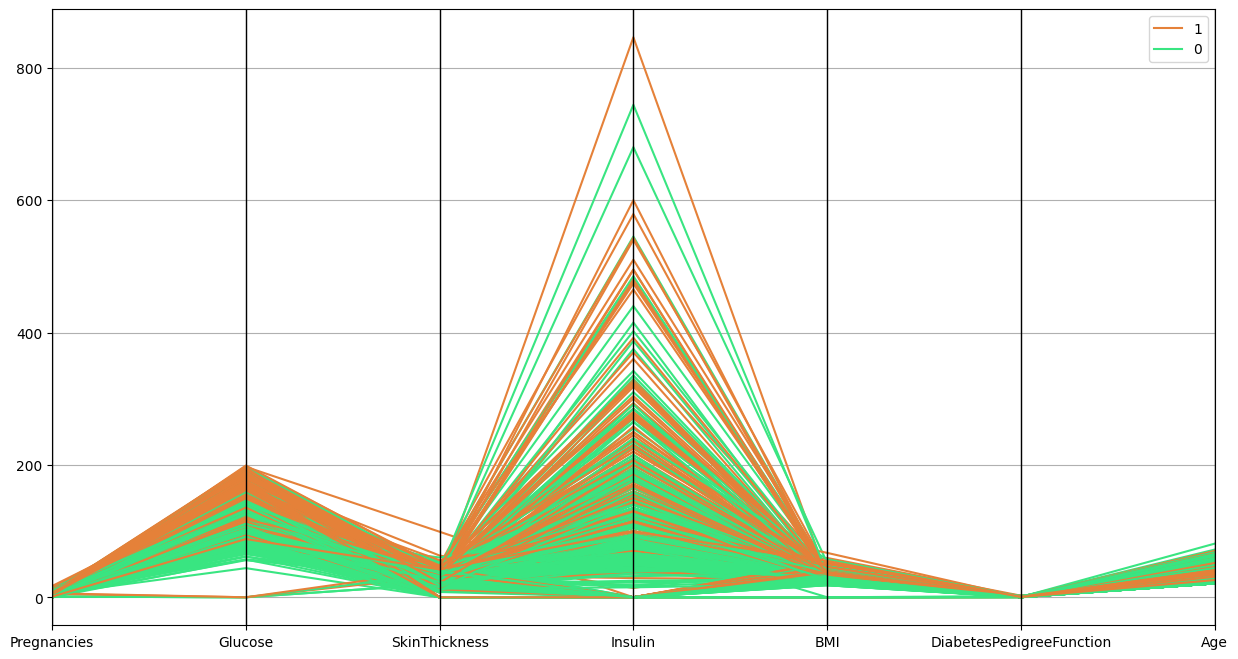

In [46]:

#Reading the total_data_sel dataset
import pandas as pd

total_data_train_sel = pd.read_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_train_sel.csv")
total_data_test_sel = pd.read_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_test_sel.csv")

total_data_sel = pd.concat([total_data_train_sel, total_data_test_sel]).reset_index(drop = True)

X_train_sel = total_data_train_sel.drop(["Outcome"], axis = 1)
X_test_sel = total_data_test_sel.drop(["Outcome"], axis = 1)

plt.figure(figsize=(15, 8))

pd.plotting.parallel_coordinates(total_data_sel, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))



In [47]:
from sklearn.tree import DecisionTreeClassifier
#Checking the purity of the nodes with the dataset total_data_sel:
#GINI
model = DecisionTreeClassifier(criterion= "gini", random_state = 8)
model.fit(X_train_sel, y_train)

DecisionTreeClassifier(random_state=8)

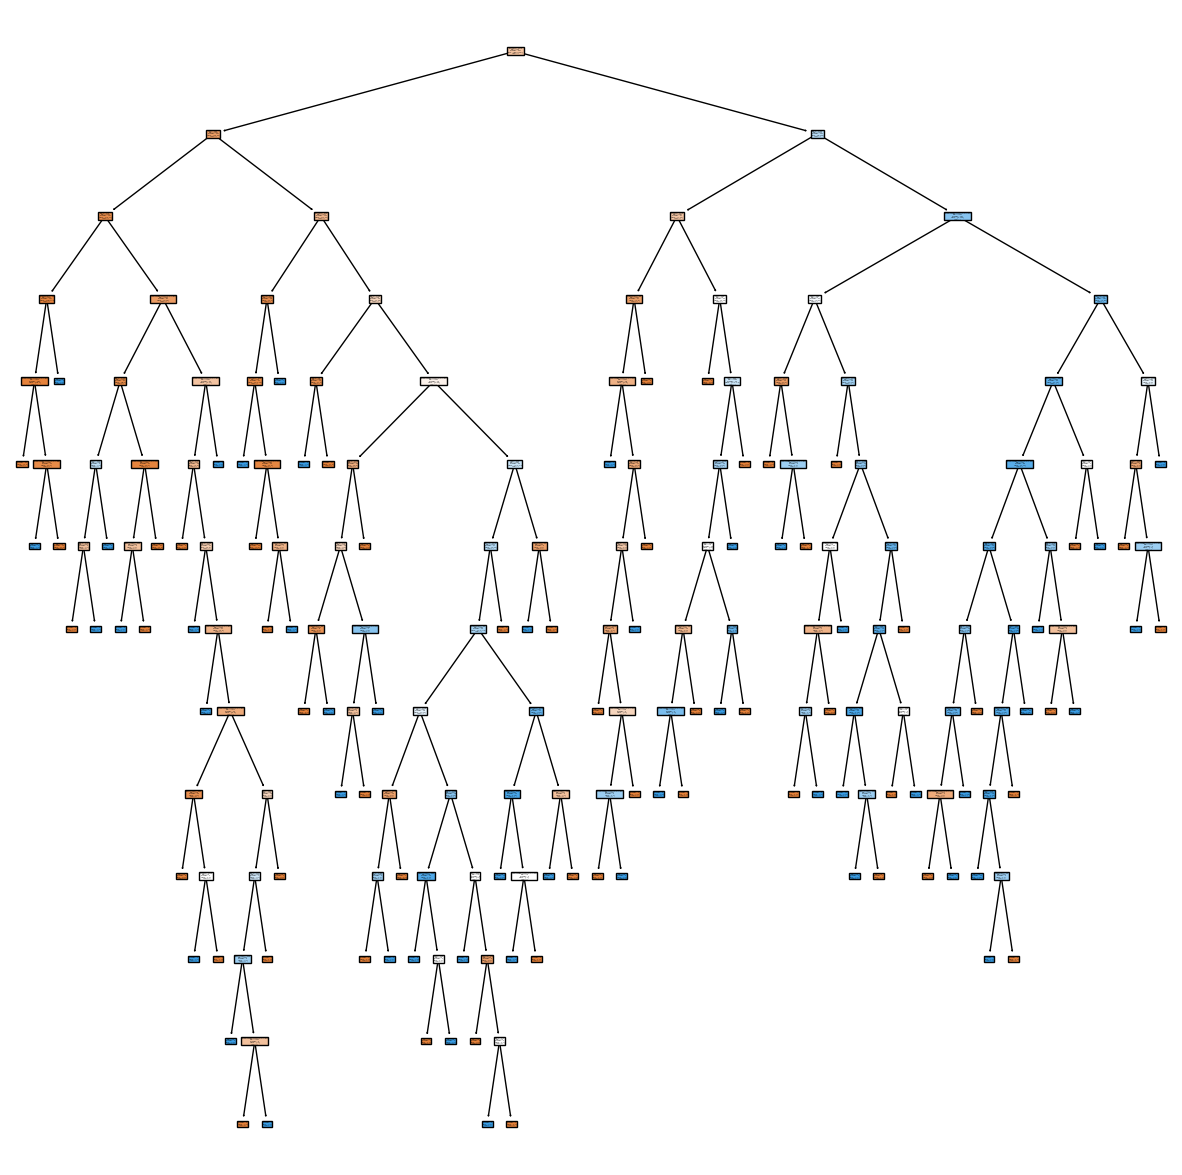

In [48]:
import matplotlib.pyplot as plt
from sklearn import tree
#Checking the purity of the nodes with the dataset total_data_sel:
#GINI

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train_sel.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [49]:
#Checking the purity of the nodes with the dataset total_data_sel:
#GINI
y_pred = model.predict(X_test_sel)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [50]:
from sklearn.metrics import accuracy_score
#Checking the purity of the nodes with the dataset total_data_sel:
#GINI
accuracy_score(y_test, y_pred)

0.7272727272727273

In [51]:
#Checking the purity of the nodes with the dataset total_data_sel:
#ENTROPY
model = DecisionTreeClassifier(criterion= "entropy", random_state = 8)
model.fit(X_train_sel, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=8)

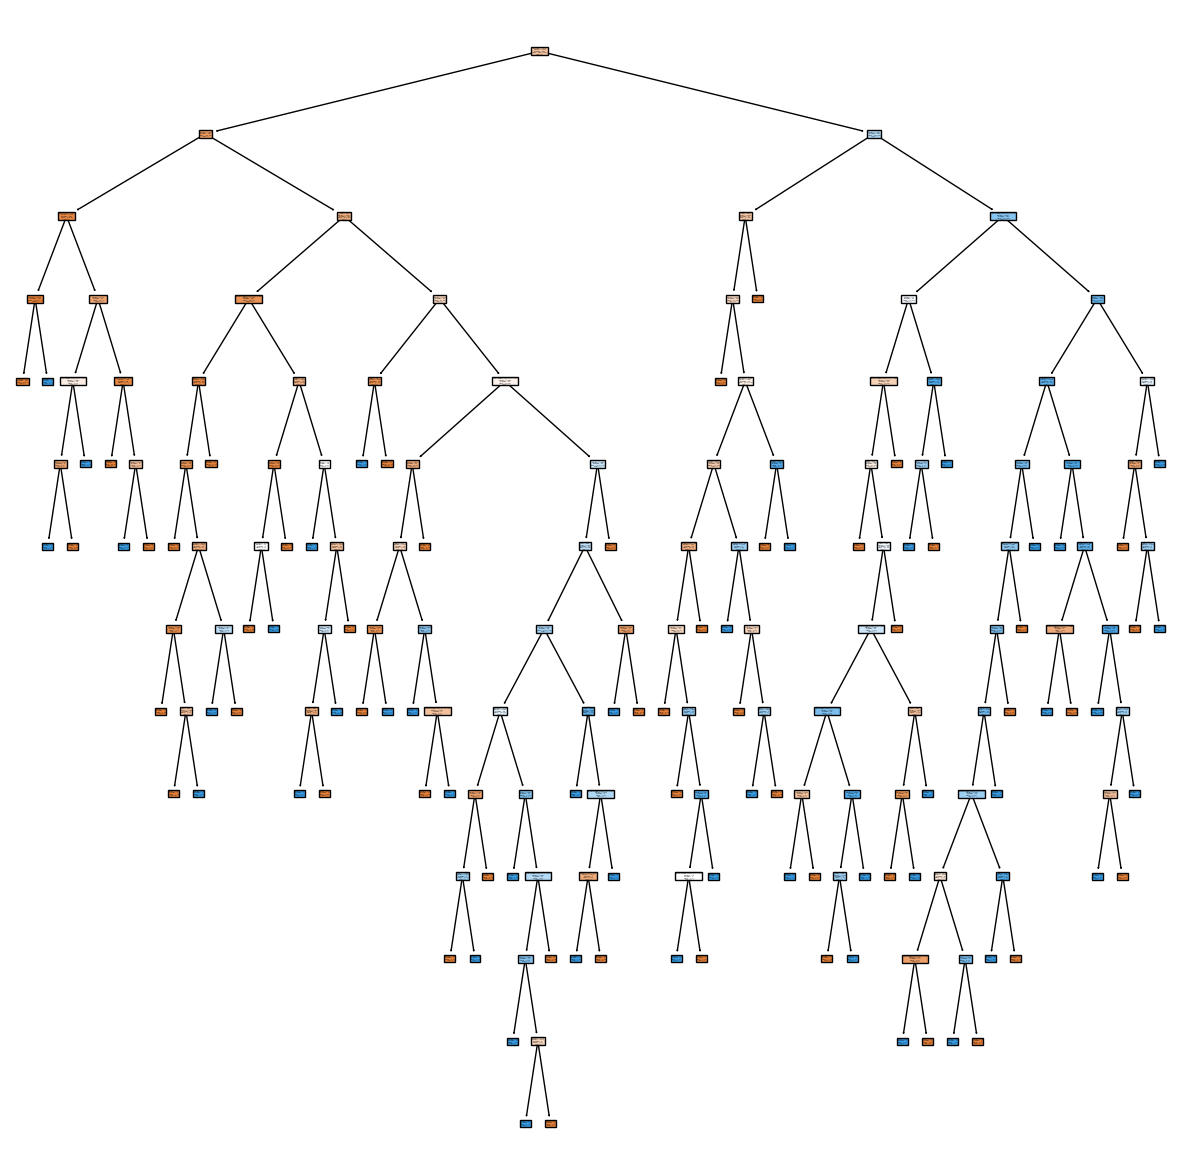

In [52]:
#Checking the purity of the nodes with the dataset total_data_sel:
#ENTROPY

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train_sel.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [53]:
#Checking the purity of the nodes with the dataset total_data_sel:
#ENTROPY
y_pred = model.predict(X_test_sel)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [54]:
#Checking the purity of the nodes with the dataset total_data_sel:
#ENTROPY

accuracy_score(y_test, y_pred)

0.6926406926406926

In [55]:
#Checking the purity of the nodes with the dataset total_data_sel:
#LOG_LOSS
model = DecisionTreeClassifier(criterion= "log_loss", random_state = 8)
model.fit(X_train_sel, y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=8)

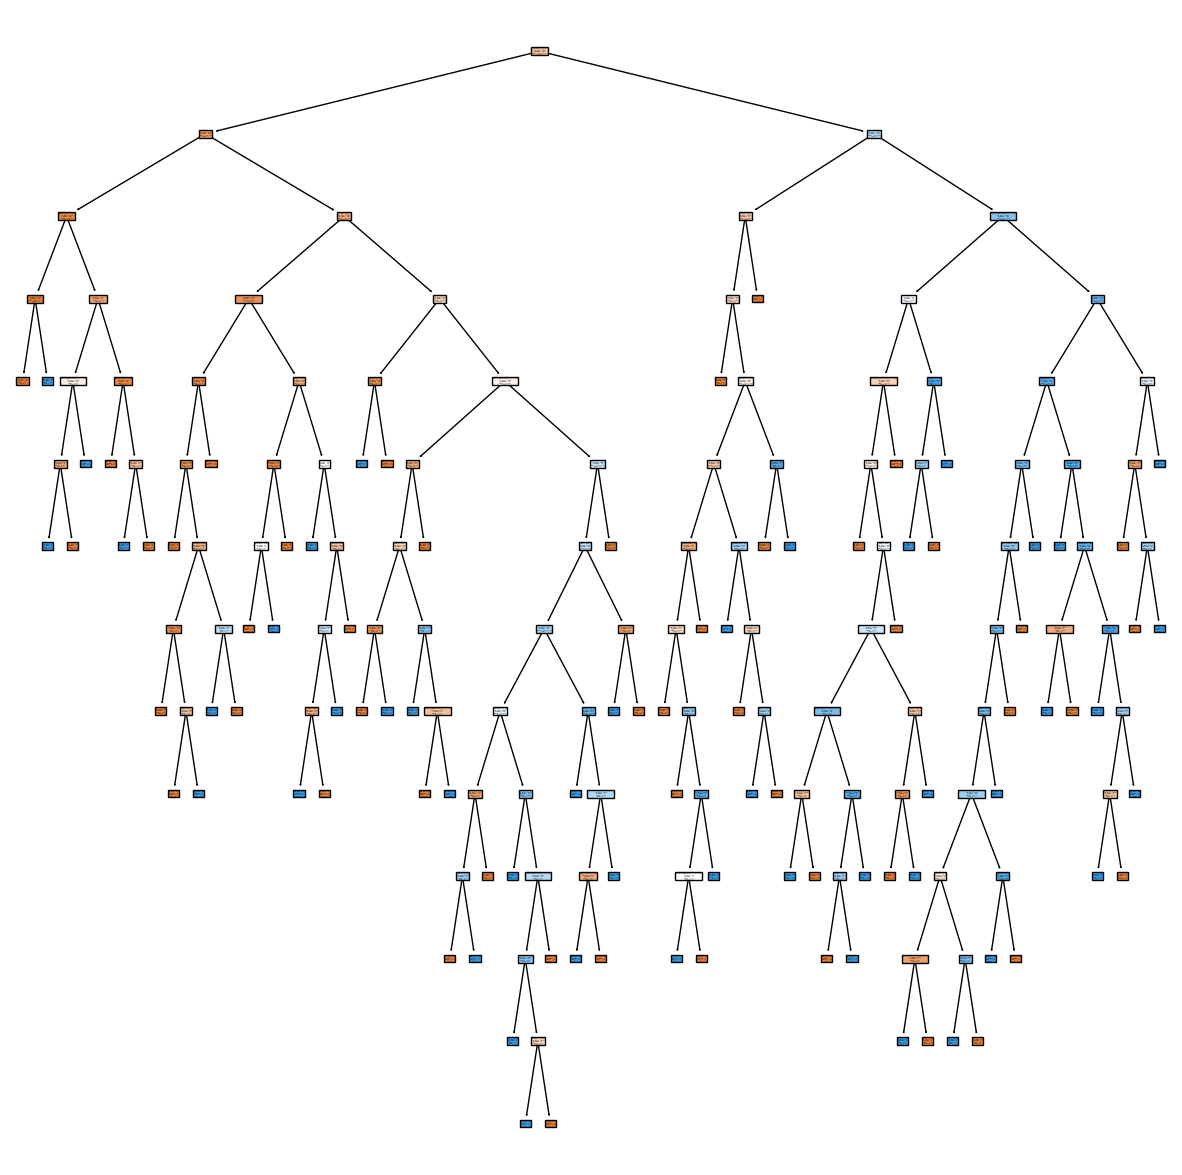

In [56]:
#Checking the purity of the nodes with the dataset total_data_sel:
#LOG_LOSS

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train_sel.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [57]:
#Checking the purity of the nodes with the dataset total_data_sel:
#LOG_LOSS
y_pred = model.predict(X_test_sel)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [58]:
#Checking the purity of the nodes with the dataset total_data_sel:
#LOG_LOSS

accuracy_score(y_test, y_pred)

0.6926406926406926

Regarding the purity of the nodes, "Gini" is the criterion that obtains the best results (0.7272727272727273) compared with "Entropy" (0.6926406926406926) and "Log_loss" (0.6926406926406926).

<Axes: >

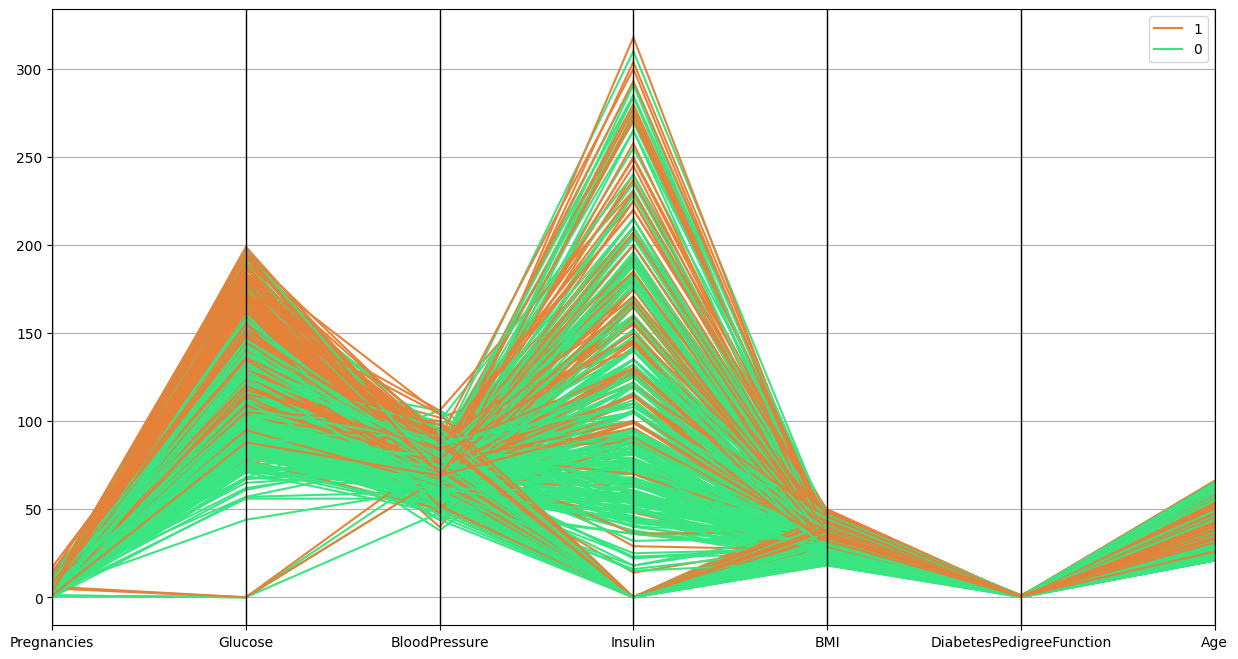

In [59]:
#Reading the total_data_no_outliers_sel dataset
total_data_no_outliers_train_sel = pd.read_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_no_outliers_train_sel.csv")
total_data_no_outliers_test_sel = pd.read_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_no_outliers_test_sel.csv")
total_data_no_outliers_sel = pd.concat([total_data_no_outliers_train_sel, total_data_no_outliers_test_sel]).reset_index(drop = True)

X_train_no_outliers_sel = total_data_no_outliers_train_sel.drop(["Outcome"], axis = 1)
X_test_no_outliers_sel = total_data_no_outliers_test_sel.drop(["Outcome"], axis = 1)

plt.figure(figsize=(15, 8))
pd.plotting.parallel_coordinates(total_data_no_outliers_sel, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))


In [60]:
#Model initialization and training
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 8)
model.fit(X_train_no_outliers_sel, y_train)

DecisionTreeClassifier(random_state=8)

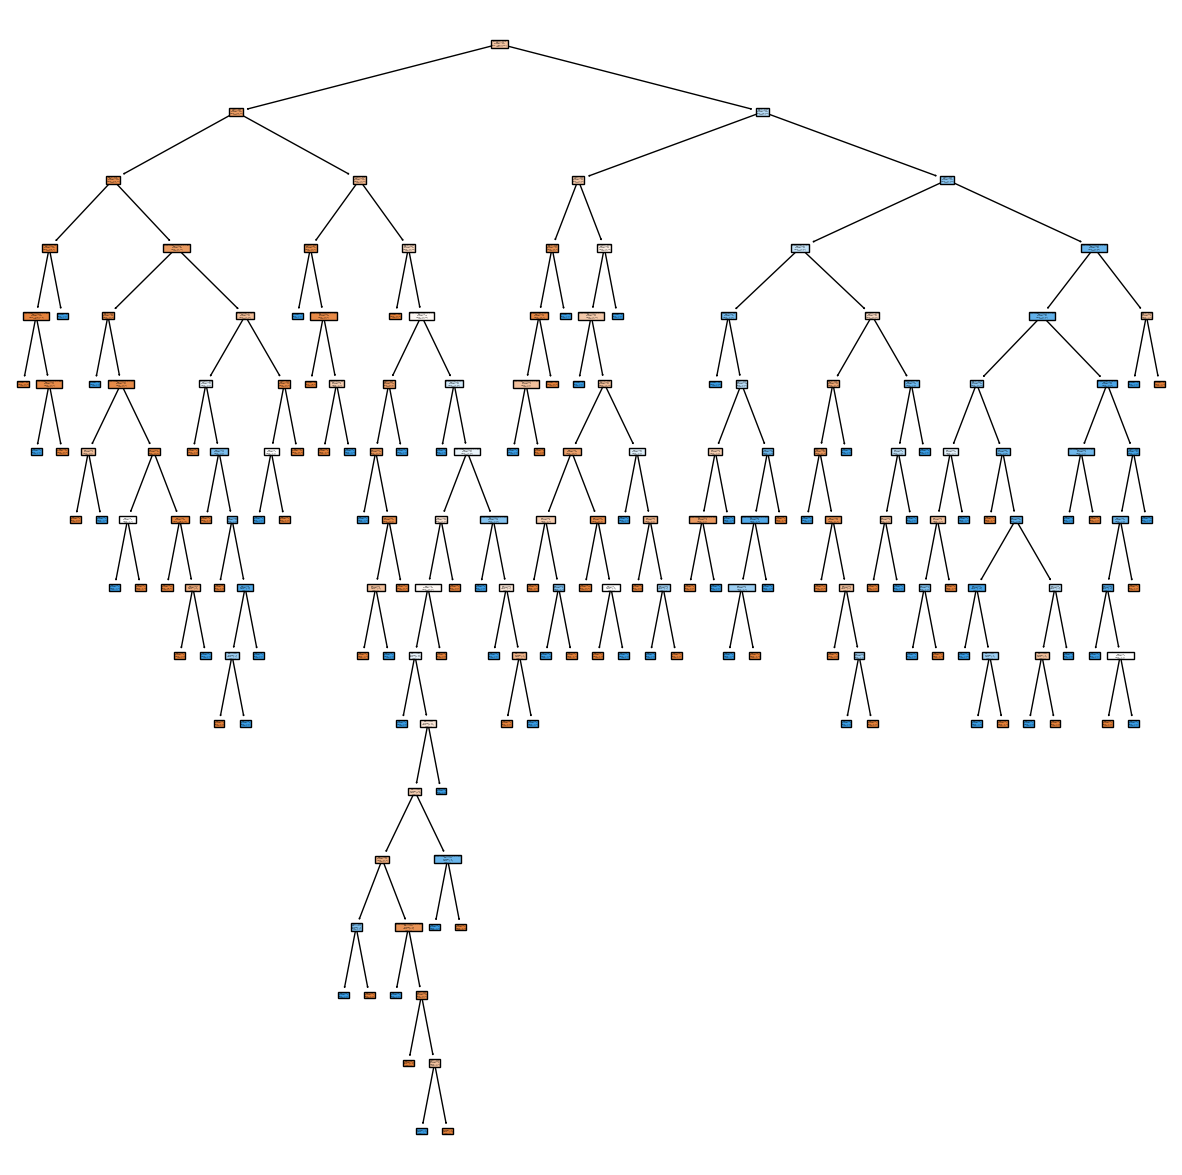

In [61]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names = list(X_train_no_outliers_sel.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()


In [62]:
#Model prediction
y_pred = model.predict(X_test_no_outliers_sel)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [63]:

#Classification
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6926406926406926

<Axes: >

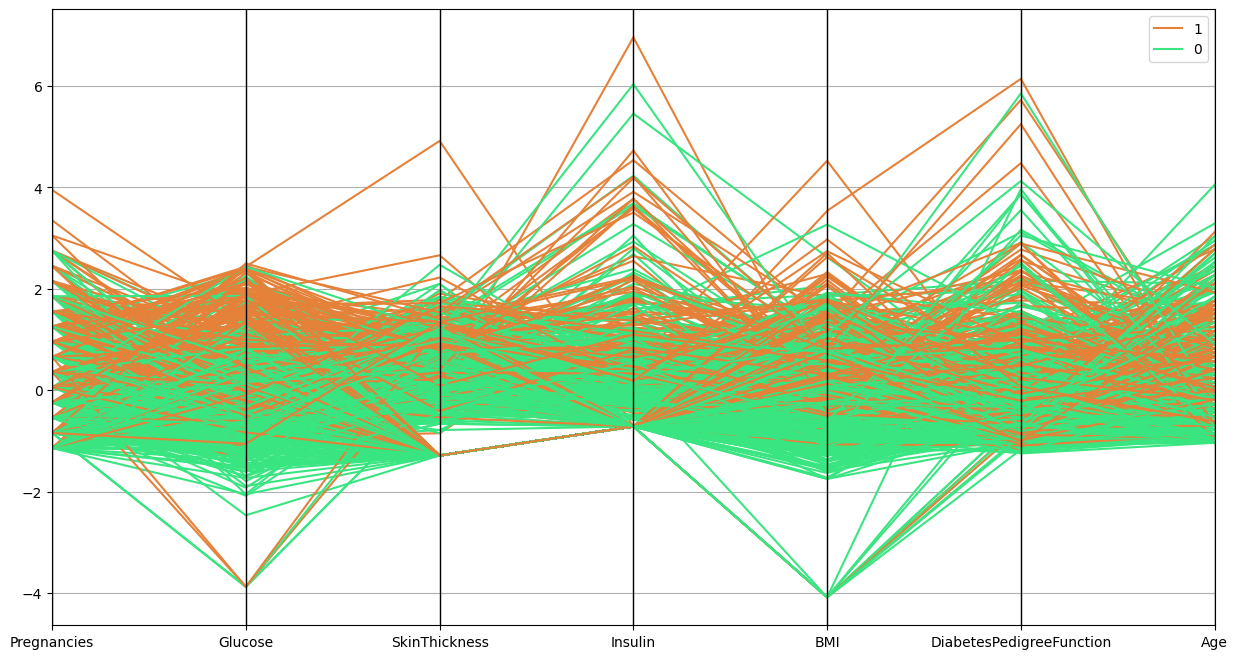

In [64]:
#Reading the total_data_norm_sel dataset
total_data_norm_train_sel = pd.read_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_norm_train_sel.csv")
total_data_norm_test_sel = pd.read_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_norm_test_sel.csv")
total_data_norm_sel = pd.concat([total_data_norm_train_sel, total_data_norm_test_sel]).reset_index(drop = True)

X_train_norm_sel = total_data_norm_train_sel.drop(["Outcome"], axis = 1)
X_test_norm_sel = total_data_norm_test_sel.drop(["Outcome"], axis = 1)

plt.figure(figsize=(15, 8))
pd.plotting.parallel_coordinates(total_data_norm_sel, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

In [65]:

#Model initialization and training
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 8)
model.fit(X_train_norm_sel, y_train)

DecisionTreeClassifier(random_state=8)

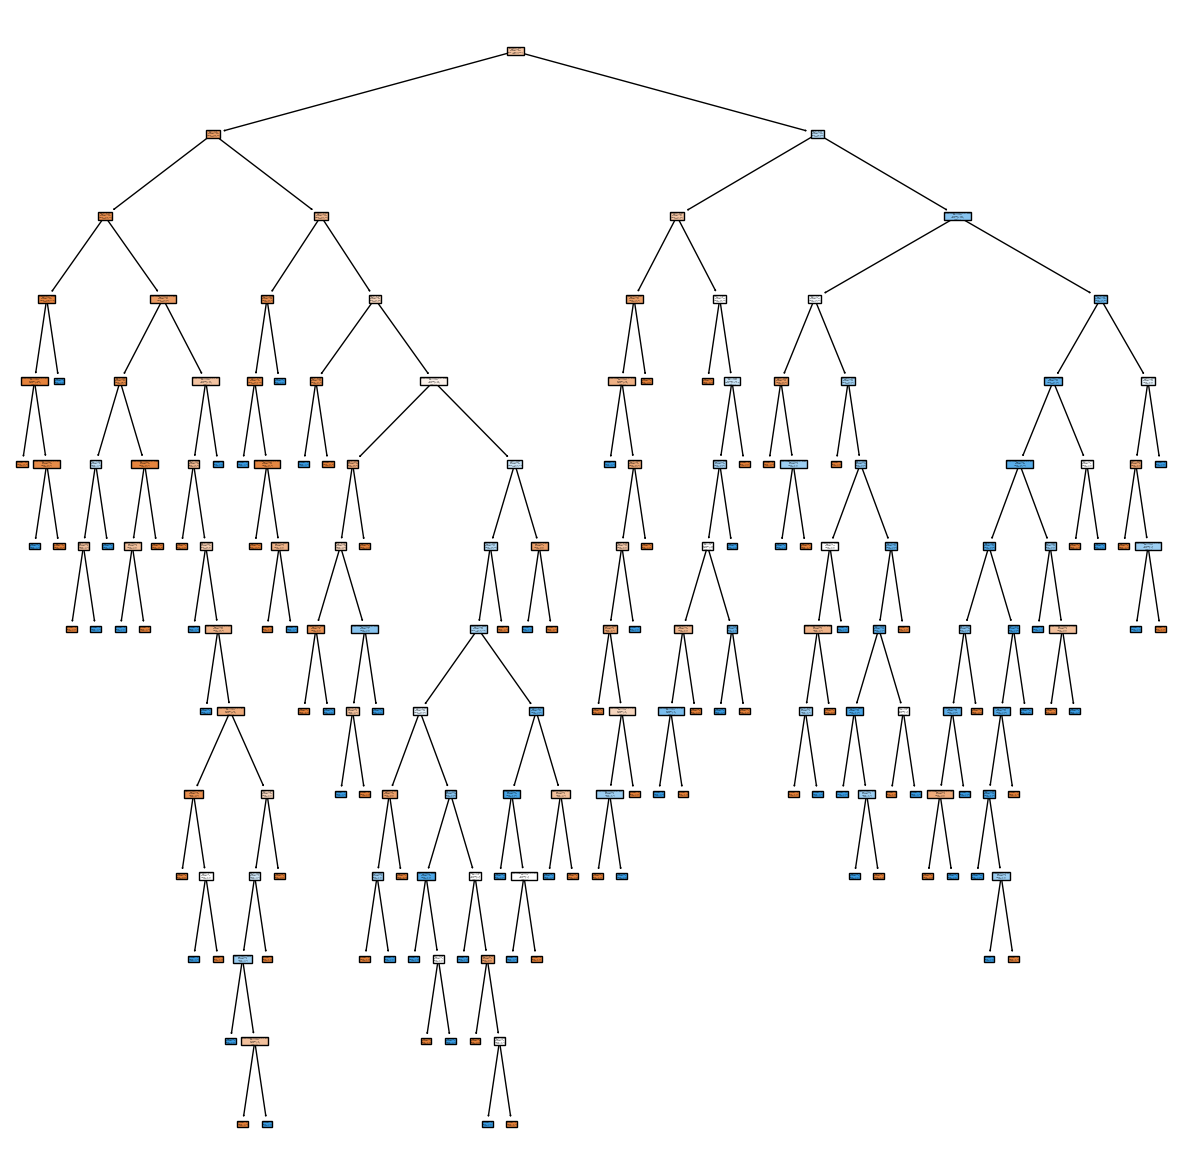

In [66]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names = list(X_train_norm_sel.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [67]:

#Model prediction
y_pred = model.predict(X_test_norm_sel)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [68]:

#Classification
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7186147186147186

<Axes: >

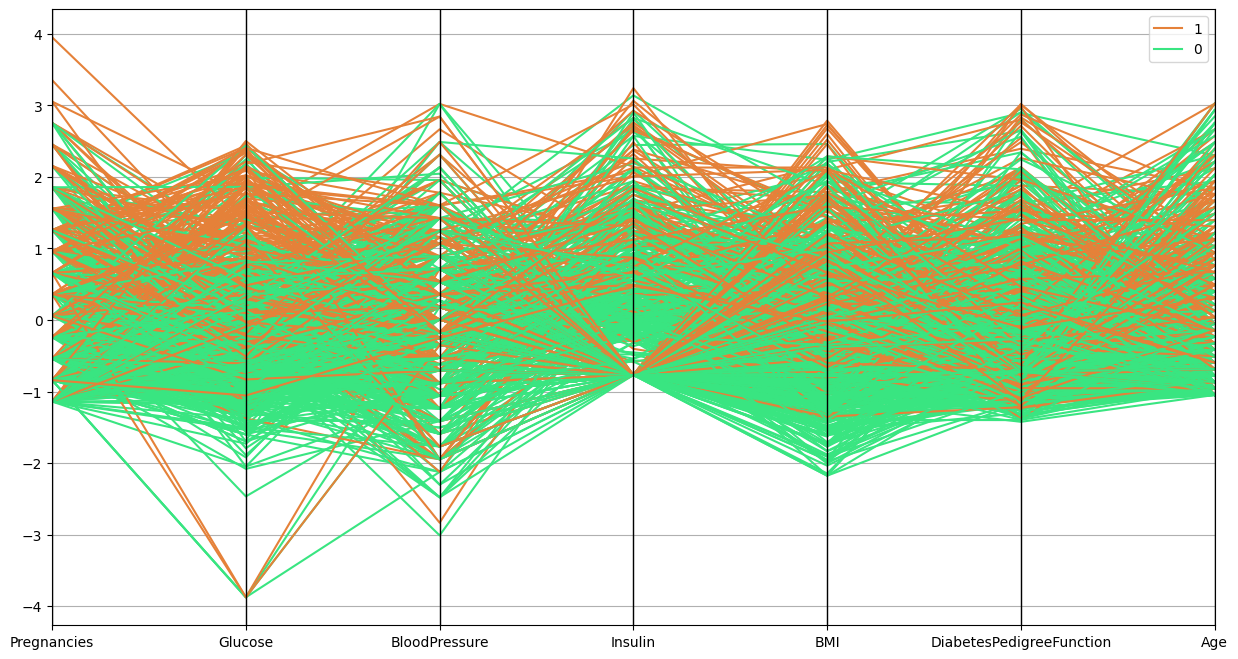

In [69]:
#Reading the total_data_no_outliers_norm
total_data_no_outliers_norm_train_sel = pd.read_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_no_outliers_norm_train_sel.csv")
total_data_no_outliers_norm_test_sel = pd.read_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_no_outliers_norm_test_sel.csv")
total_data_no_outliers_norm_sel = pd.concat([total_data_no_outliers_norm_train_sel, total_data_no_outliers_norm_test_sel]).reset_index(drop = True)

X_train_no_outliers_norm_sel = total_data_no_outliers_norm_train_sel.drop(["Outcome"], axis = 1)
X_test_no_outliers_norm_sel = total_data_no_outliers_norm_test_sel.drop(["Outcome"], axis = 1)


plt.figure(figsize=(15, 8))
pd.plotting.parallel_coordinates(total_data_no_outliers_norm_sel, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))



In [70]:
#Model initialization and training
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 8)
model.fit(X_train_no_outliers_norm_sel, y_train)

DecisionTreeClassifier(random_state=8)

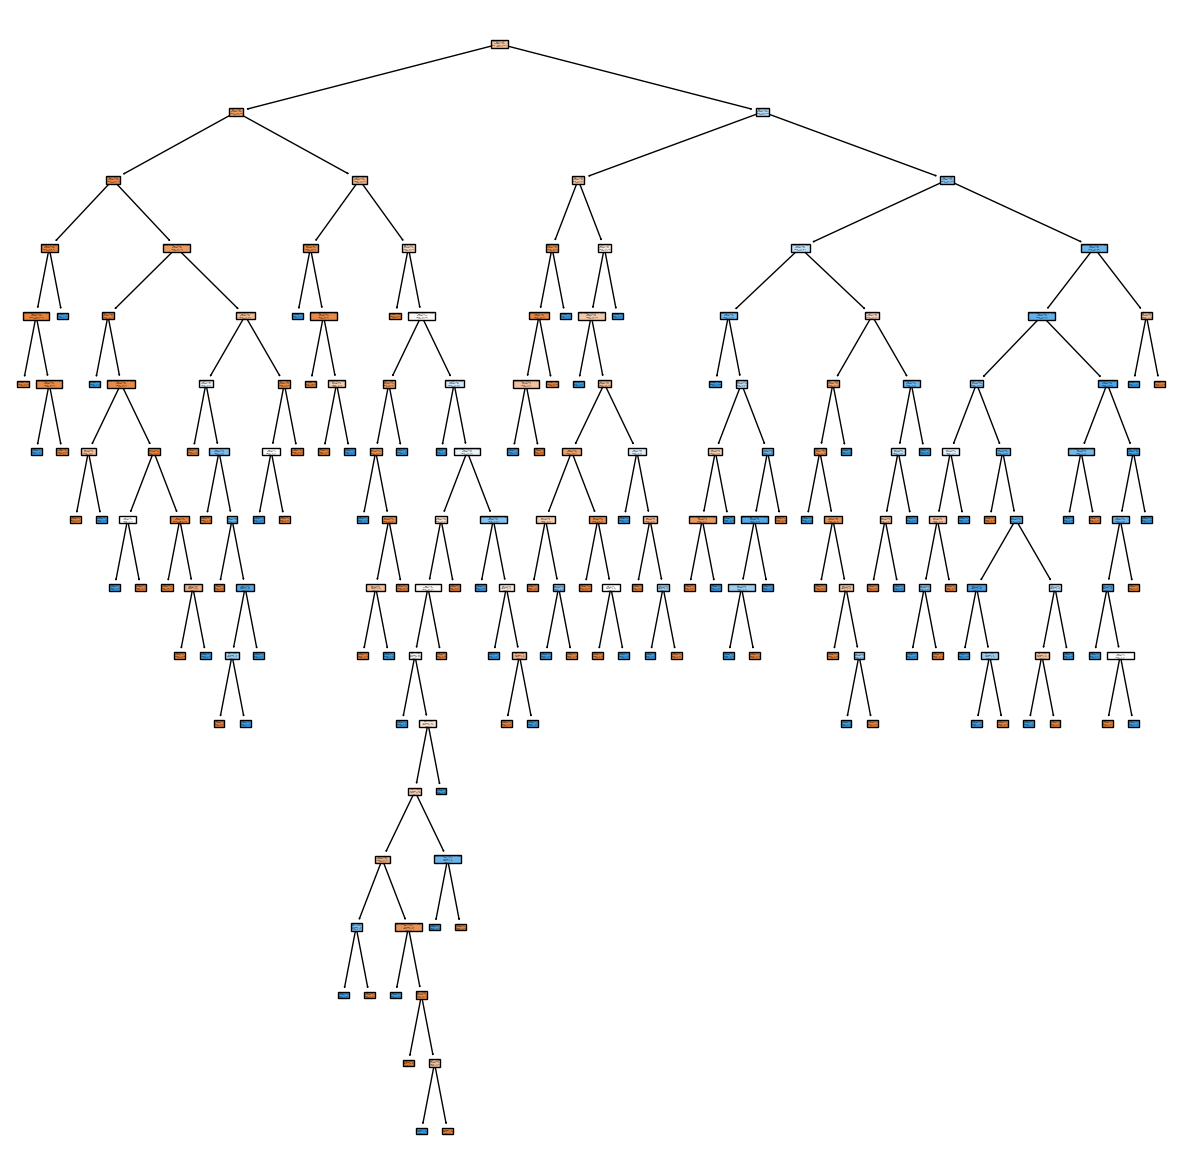

In [71]:

from sklearn import tree
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names = list(X_train_no_outliers_norm_sel.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()


In [72]:

#Model prediction
y_pred = model.predict(X_test_no_outliers_norm_sel)
y_pred


array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [73]:
#Classification
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6883116883116883

<Axes: >

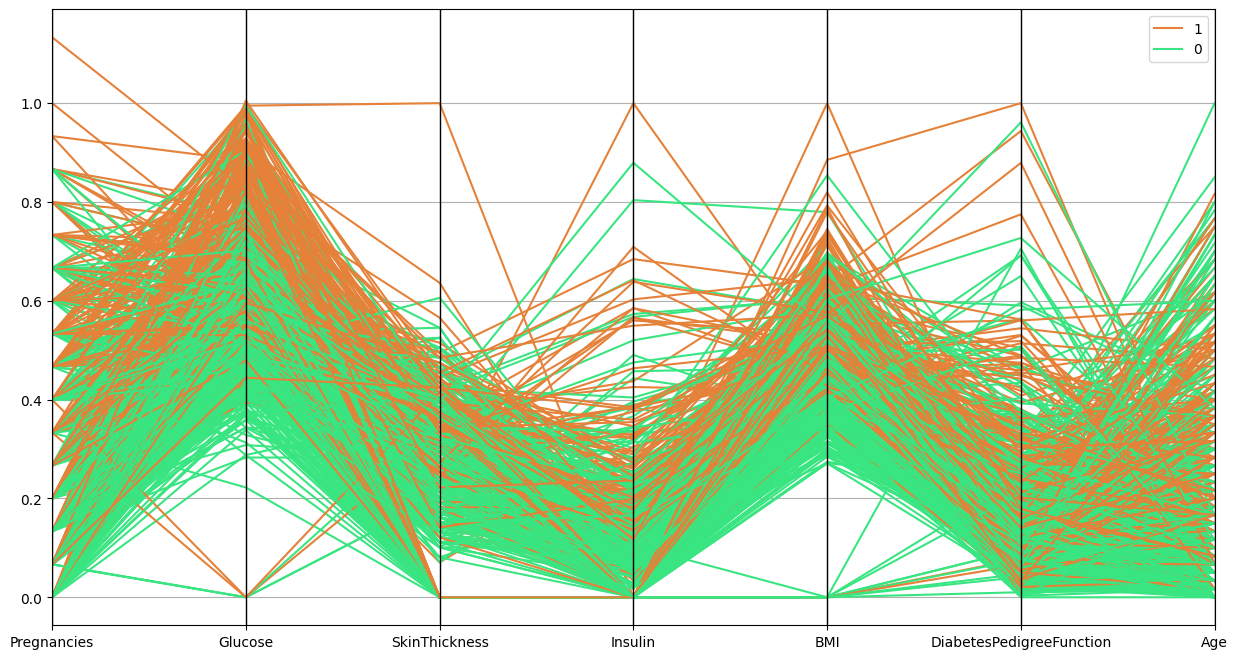

In [74]:
#Reading the total_data_norm_sel dataset
total_data_scal_train_sel = pd.read_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_scal_train_sel.csv")
total_data_scal_test_sel = pd.read_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_scal_test_sel.csv")
total_data_scal_sel = pd.concat([total_data_scal_train_sel, total_data_scal_test_sel]).reset_index(drop = True)

X_train_scal_sel = total_data_scal_train_sel.drop(["Outcome"], axis = 1)
X_test_scal_sel = total_data_scal_test_sel.drop(["Outcome"], axis = 1)


plt.figure(figsize=(15, 8))
pd.plotting.parallel_coordinates(total_data_scal_sel, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))


In [75]:
#Model initialization and training
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 8)
model.fit(X_train_scal_sel, y_train)

DecisionTreeClassifier(random_state=8)

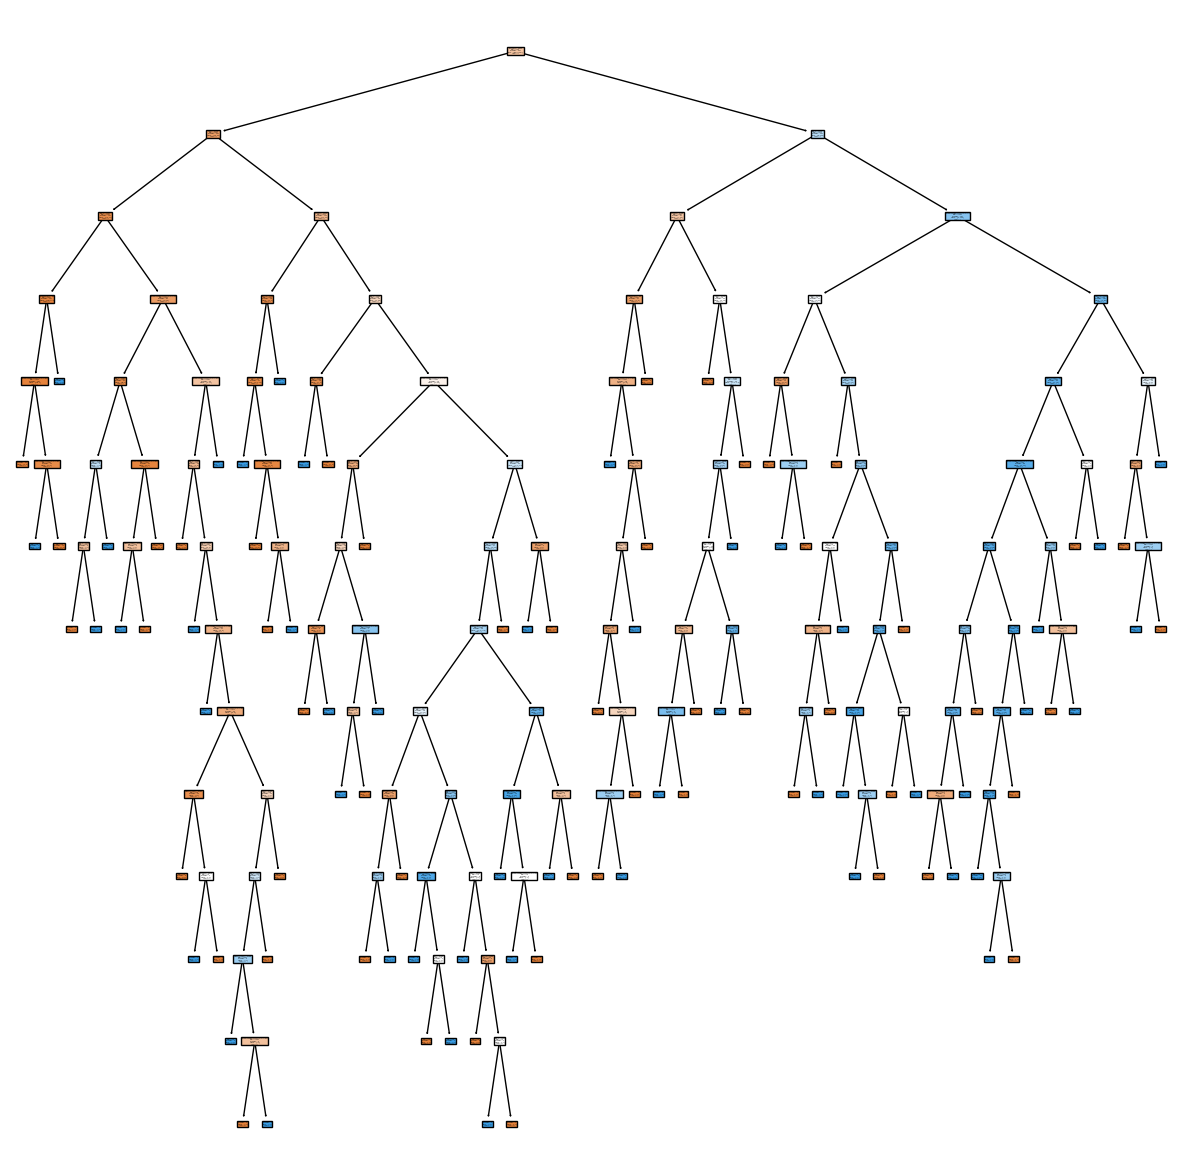

In [76]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names = list(X_train_scal_sel.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [77]:
#Model prediction
y_pred = model.predict(X_test_scal_sel)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [78]:

#Classification
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7186147186147186

<Axes: >

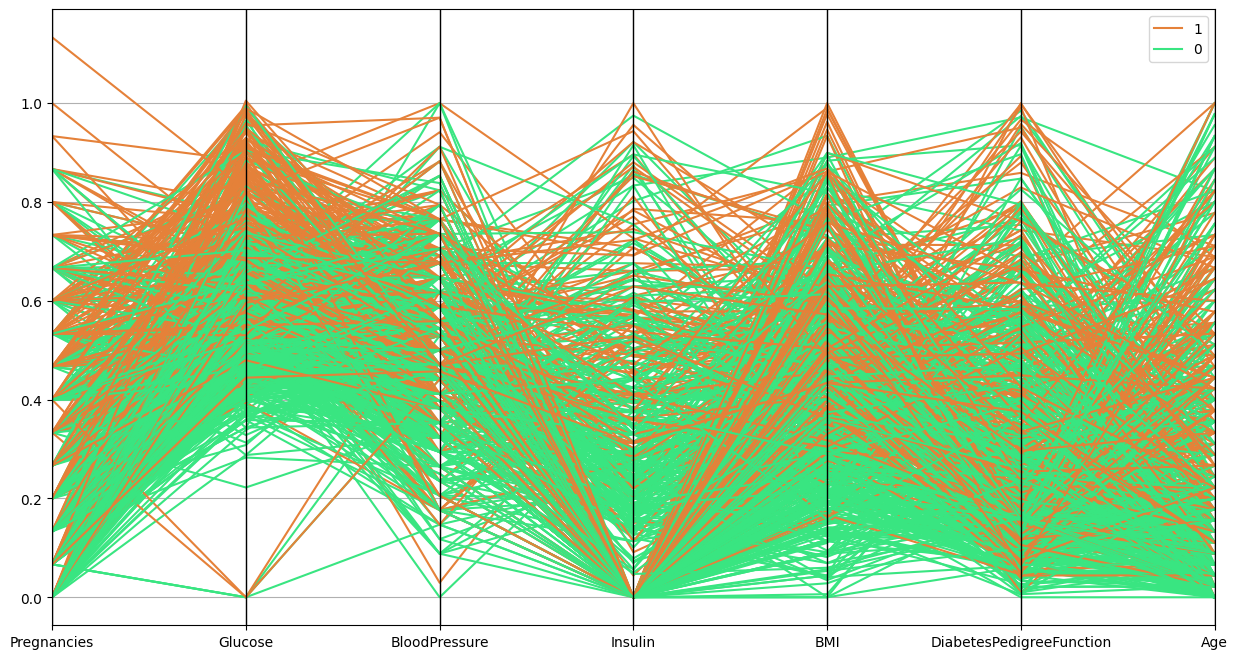

In [79]:
#Reading the total_data_no_outliers_scal dataset
total_data_no_outliers_scal_train_sel = pd.read_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_no_outliers_scal_train_sel.csv")
total_data_no_outliers_scal_test_sel = pd.read_csv("/workspaces/machine-learning-decision-tree/data/processed/total_data_no_outliers_scal_test_sel.csv")
total_data_no_outliers_scal_sel = pd.concat([total_data_no_outliers_scal_train_sel, total_data_no_outliers_scal_test_sel]).reset_index(drop = True)

X_train_no_outliers_scal_sel = total_data_no_outliers_scal_train_sel.drop(["Outcome"], axis = 1)
X_test_no_outliers_scal_sel = total_data_no_outliers_scal_test_sel.drop(["Outcome"], axis = 1)


plt.figure(figsize=(15, 8))
pd.plotting.parallel_coordinates(total_data_no_outliers_scal_sel, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))


In [80]:
#Model initialization and training
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 8)
model.fit(X_train_no_outliers_scal_sel, y_train)

DecisionTreeClassifier(random_state=8)

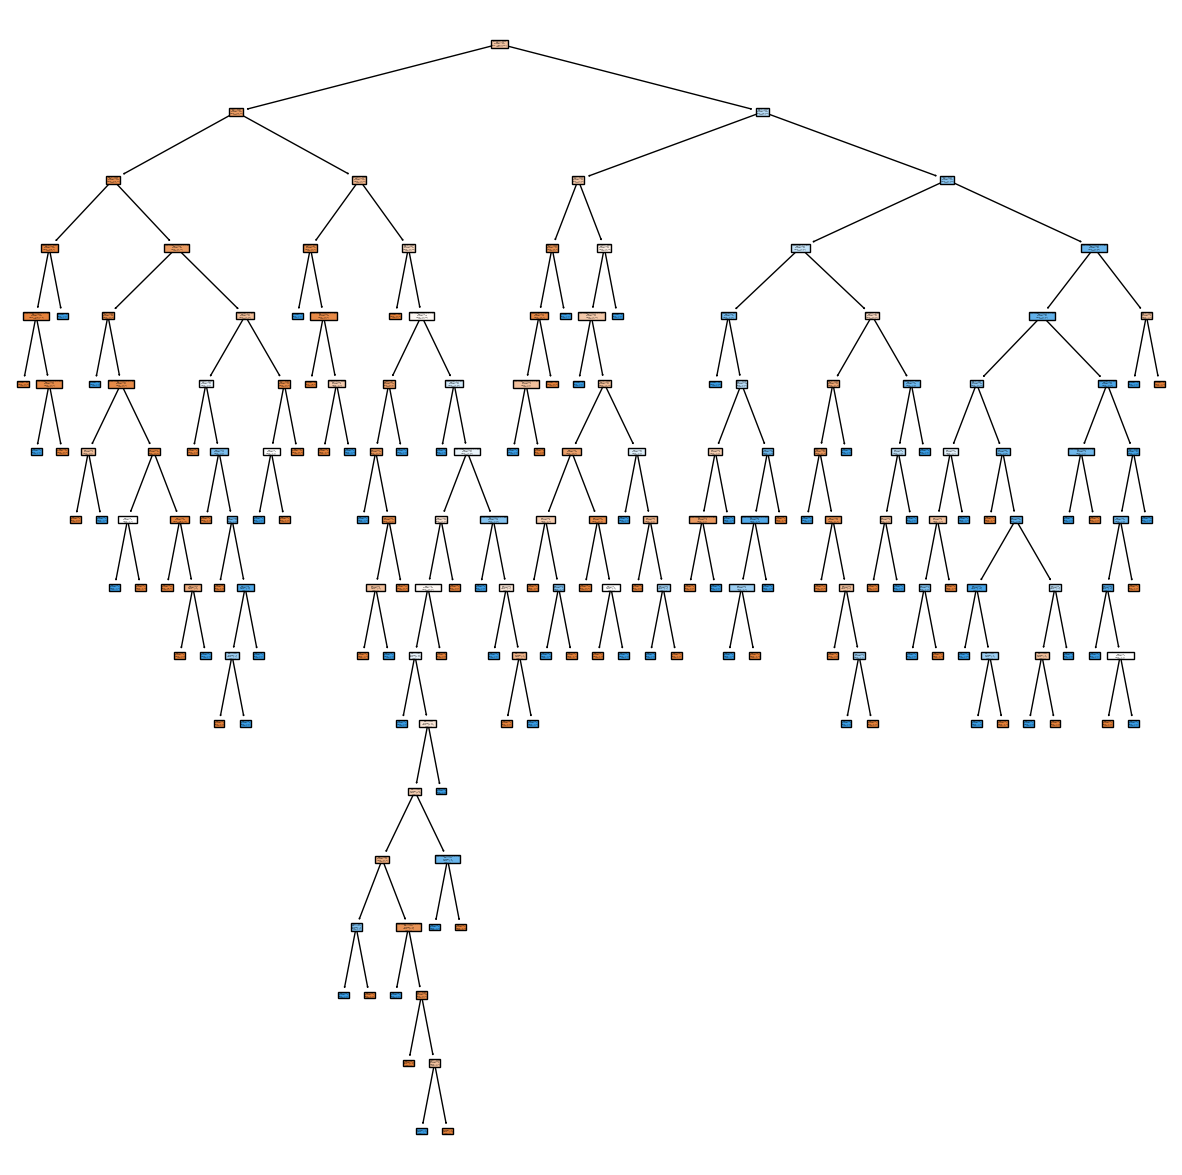

In [81]:

from sklearn import tree
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names = list(X_train_no_outliers_scal_sel.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [82]:
#Model prediction
y_pred = model.predict(X_test_no_outliers_scal_sel)
y_pred


array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [83]:

#Classification
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.6883116883116883

The data set with the best performance is total_data_sel, so we'll use this one for the optimization. 

In [84]:
#Model optimization

#Grid search
from sklearn.model_selection import GridSearchCV

# We define the parameters that we want to adjust by hand
hyperparams = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2,6,10],
    "min_samples_leaf": [1,2,4,]
}


# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 6, 10]},
             scoring='accuracy')

In [85]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_sel, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [86]:

model_grid = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=8)
model_grid.fit(X_train_sel, y_train)
y_pred = model_grid.predict(X_test_sel)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.7402597402597403

The results have slightly improved from 0.7272727272727273 to 0.7402597402597403.

In [87]:
from pickle import dump

dump(model, open("/workspaces/machine-learning-decision-tree/models/tree_classifier_crit-gini_maxdepth-5_minleaf-1_minsplit-2_8.sav", "wb"))


